In [1]:
import pandas as pd
import numpy as np
from RF_Shap import RFShap
import os
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# import statsmodels.stats.multicomp as mc

# comp = mc.MultiComparison(dataset['PPR'], dataset['sample'])
# post_hoc_res = comp.tukeyhsd()
# print(post_hoc_res.summary())

In [2]:
k = 10
class_ = 'RF'
config = None
k_cv = 'k_fold'
trn_tst_split = .6
specific_var = None
interaction_vars = None
total_vars = 81
num_disp_1 = 10
num_disp_2 = 20
od = '/home/matthewvowels/GitHub/Psych_ML/Aff_Eff_PPR/output/'

def make_folder(path):
        if not os.path.exists(path):
            os.makedirs(path)

impute = 1

folder = '/home/matthewvowels/GitHub/Psych_ML/Data/'

if impute == 1:
    data_file = 'combined_ML.csv'
    dataset = pd.read_csv(folder+data_file, delim_whitespace=False, na_values=[' ', '#VALUE!'])
    cols = dataset.columns
    imp = IterativeImputer(estimator=None, max_iter=100, random_state=0)
    imp.fit(dataset)
    IterativeImputer(random_state=0)
    dataset = pd.DataFrame(data=imp.transform(dataset), columns=cols)
    dataset.drop('Unnamed: 0', axis='columns', inplace=True)
    dataset.to_csv(folder+'combined_ML_imputed.csv', index=False)
else:
    data_file= 'combined_ML_imputed.csv'
    dataset = pd.read_csv(folder+data_file, delim_whitespace=False, na_values=[' ', '#VALUE!'])
    cols = dataset.columns
    


In [3]:
bin_vars = ['dating',
        'cohabiting',
        'married',
        'children',
        'sex',
        'black',
        'asian',
        'white',
        'hispanic',
        'nocollege',
        'somecollege',
        'bachelors',
        'graduate',
        'bsex',
        'bblack',
        'basian',
        'bwhite',
        'bhispanic',
        'bnocollege',
        'bsomecollege',
        'bbachelors',
        'bgraduate']

for var in bin_vars:
    dataset[var] = np.round(dataset[var],0)
    
print(dataset.shape)

(1474, 81)


In [4]:
# remove duplicates in sample 3
ds3 = dataset[(dataset['sample']==3)].iloc[::2]
print(ds3.shape)
dataset = dataset[(dataset['sample']!=3)]
dataset = pd.concat((dataset, ds3))

(374, 81)


In [ ]:
k = 10
outcome_var = 'PPR'

ds = dataset[(dataset['sample']<5)]

remove_cols = ['sample', 'coupleid', 'ldprom', 'ldprev', 'conf', 'sac', 'scc', 'sdta', 'sdtr', 'sdtc',
 'aff', 'bldprom', 'bldprev', 'bconf', 'bsac', 'bscc', 'bsdta', 'bsdtr', 'bsdtc', 'b_aff']

results_dir = os.path.join(od, outcome_var + '_AP1')
make_folder(results_dir)
model_dir = os.path.join(od, 'model.sav')

shap_env = RFShap(model_dir=None, exclude_vars=remove_cols, outcome_var=outcome_var,
                  output_dir=results_dir, random_seed=42, class_=class_,type_='reg', balanced='balanced', trn_tst_split=trn_tst_split,
                    k_cv=k_cv, k=k)
ds, X, y, xtr, xts, ytr, ytst  = shap_env.munch(dataset=ds)

In [ ]:
model = shap_env.make_model(config)
model, report = shap_env.train_test()
print(report)

explainer, shap_vals = shap_env.run_shap_explainer(model=model)


specific_var = None
interaction_vars = None
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)
# specific_var = None
# interaction_vars = ['sat', 'empp']
# # to create plots (and automatrically save them to the output directory):
# interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
# interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)

# shap_vals_bootstrap, results = shap_env.shap_bootstrap(model=model, retrain=False, n_bootstraps=500, n_samples=60, class_ind=0)

In [ ]:
k = 10
outcome_var = 'PPR'

ds = dataset[(dataset['sample']<5)]
ds = ds.iloc[:, :44]
remove_cols = ['sample', 'coupleid', 'ldprom', 'ldprev', 'conf', 'sac', 'scc', 'sdta', 'sdtr', 'sdtc', 'aff']

results_dir = os.path.join(od, outcome_var + '_A1')
make_folder(results_dir)
model_dir = os.path.join(od, 'model.sav')

shap_env = RFShap(model_dir=None, exclude_vars=remove_cols, outcome_var=outcome_var,
                  output_dir=results_dir, random_seed=42, class_=class_,type_='reg', balanced='balanced', trn_tst_split=trn_tst_split,
                    k_cv=k_cv, k=k)
ds, X, y, xtr, xts, ytr, ytst  = shap_env.munch(dataset=ds)

model = shap_env.make_model(config)
model, report = shap_env.train_test()
print(report)

explainer, shap_vals = shap_env.run_shap_explainer(model=model)



specific_var = None
interaction_vars = ['health', 'sat']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)

# shap_vals_bootstrap, results = shap_env.shap_bootstrap(model=model, retrain=False, n_bootstraps=500, n_samples=60, class_ind=0)

In [ ]:
k = 10
outcome_var = 'PPR'

ds = dataset[(dataset['sample']<4)]
ds = ds.iloc[:, :44]
remove_cols = ['sample', 'coupleid', 'scc', 'sdta', 'sdtr', 'sdtc', 'aff']

results_dir = os.path.join(od, outcome_var + '_A2')
make_folder(results_dir)
model_dir = os.path.join(od, 'model.sav')

shap_env = RFShap(model_dir=None, exclude_vars=remove_cols, outcome_var=outcome_var,
                  output_dir=results_dir, random_seed=42, class_=class_,type_='reg', balanced='balanced', trn_tst_split=trn_tst_split,
                    k_cv=k_cv, k=k)
ds, X, y, xtr, xts, ytr, ytst  = shap_env.munch(dataset=ds)

model = shap_env.make_model(config)
model, report = shap_env.train_test()
print(report)

explainer, shap_vals = shap_env.run_shap_explainer(model=model)



specific_var = None
interaction_vars = ['health', 'sat']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)

# shap_vals_bootstrap, results = shap_env.shap_bootstrap(model=model, retrain=False, n_bootstraps=500, n_samples=60, class_ind=0)

In [ ]:
k = 10
outcome_var = 'PPR'

ds = dataset[(dataset['sample']!=5)] 
ds = ds[(ds['sample']!=2)]
ds = ds.iloc[:, :44]
remove_cols = ['sample', 'coupleid', 'ldprom', 'ldprev', 'conf', 'sac', 'scc', 'aff']

results_dir = os.path.join(od, outcome_var + '_A3')
make_folder(results_dir)
model_dir = os.path.join(od, 'model.sav')

shap_env = RFShap(model_dir=None, exclude_vars=remove_cols, outcome_var=outcome_var,
                  output_dir=results_dir, random_seed=42, class_=class_,type_='reg', balanced='balanced', trn_tst_split=trn_tst_split,
                    k_cv=k_cv, k=k)
ds, X, y, xtr, xts, ytr, ytst  = shap_env.munch(dataset=ds)

model = shap_env.make_model(config)
model, report = shap_env.train_test()
print(report)

explainer, shap_vals = shap_env.run_shap_explainer(model=model)




specific_var = None
interaction_vars = ['tru', 'com']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)
specific_var = None
interaction_vars = ['tru', 'empp']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)

# shap_vals_bootstrap, results = shap_env.shap_bootstrap(model=model, retrain=False, n_bootstraps=500, n_samples=60, class_ind=0)

In [ ]:
k = 10
outcome_var = 'PPR'

ds = dataset[(dataset['sample']<4)]

remove_cols = ['sample', 'coupleid', 'scc', 'sdta', 'sdtr', 'sdtc', 'aff', 'bscc',
               'bsdta', 'bsdtr', 'bsdtc', 'b_aff']

results_dir = os.path.join(od, outcome_var + '_AP2')
make_folder(results_dir)
model_dir = os.path.join(od, 'model.sav')

shap_env = RFShap(model_dir=None, exclude_vars=remove_cols, outcome_var=outcome_var,
                  output_dir=results_dir, random_seed=42, class_=class_,type_='reg', balanced='balanced', trn_tst_split=trn_tst_split,
                    k_cv=k_cv, k=k)
ds, X, y, xtr, xts, ytr, ytst  = shap_env.munch(dataset=ds)

model = shap_env.make_model(config)
model, report = shap_env.train_test()
print(report)

explainer, shap_vals = shap_env.run_shap_explainer(model=model)



specific_var = None
interaction_vars = ['health', 'sat']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)

# shap_vals_bootstrap, results = shap_env.shap_bootstrap(model=model, retrain=False, n_bootstraps=500, n_samples=60, class_ind=0)

In [ ]:
k = 10
outcome_var = 'PPR'

ds = dataset[(dataset['sample']!=5)]
ds = ds[(ds['sample']!=2)]
remove_cols = ['sample', 'coupleid', 'ldprom', 'ldprev', 'conf', 'sac', 'scc', 'aff', 'bldprom',
               'bldprev', 'bconf', 'bsac', 'bscc', 'b_aff']

results_dir = os.path.join(od, outcome_var + '_AP3')
make_folder(results_dir)
model_dir = os.path.join(od, 'model.sav')

shap_env = RFShap(model_dir=None, exclude_vars=remove_cols, outcome_var=outcome_var,
                  output_dir=results_dir, random_seed=42, class_=class_,type_='reg', balanced='balanced', trn_tst_split=trn_tst_split,
                    k_cv=k_cv, k=k)
ds, X, y, xtr, xts, ytr, ytst  = shap_env.munch(dataset=ds)

model = shap_env.make_model(config)
model, report = shap_env.train_test()
print(report)

explainer, shap_vals = shap_env.run_shap_explainer(model=model)

specific_var = None
interaction_vars = ['tru', 'empp']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)

# shap_vals_bootstrap, results = shap_env.shap_bootstrap(model=model, retrain=False, n_bootstraps=500, n_samples=60, class_ind=0)

In [ ]:
k = 10
outcome_var = 'aff'

ds = dataset[(dataset['sample']!=1)]
ds = ds[(ds['sample']!=2)]
ds = ds.iloc[:, :44]
remove_cols = ['sample','coupleid', 'goal', 'PPR', 'ldprom', 'ldprev', 'conf', 'sac',
               'scc', 'sdta', 'sdtr', 'sdtc']

results_dir = os.path.join(od, outcome_var + '_A1')
make_folder(results_dir)
model_dir = os.path.join(od, 'model.sav')

shap_env = RFShap(model_dir=None, exclude_vars=remove_cols, outcome_var=outcome_var,
                  output_dir=results_dir, random_seed=42, class_=class_,type_='reg', balanced='balanced', trn_tst_split=trn_tst_split,
                    k_cv=k_cv, k=k)
ds, X, y, xtr, xts, ytr, ytst  = shap_env.munch(dataset=ds)

model = shap_env.make_model(config)
model, report = shap_env.train_test()
print(report)

explainer, shap_vals = shap_env.run_shap_explainer(model=model)


specific_var = None
interaction_vars = ['tru', 'sat']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)
specific_var = None
interaction_vars = ['tru', 'swb']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)

# shap_vals_bootstrap, results = shap_env.shap_bootstrap(model=model, retrain=False, n_bootstraps=500, n_samples=60, class_ind=0)

In [ ]:
k = 10
outcome_var = 'aff'

ds = dataset[(dataset['sample']!=1)]
ds = ds[(ds['sample']!=2)]
remove_cols =['sample','coupleid', 'goal', 'PPR', 'ldprom', 'ldprev', 'conf', 'sac', 'scc', 'sdta',
              'sdtr', 'sdtc', 'bgoal', 'bPPR', 'bldprom', 'bldprev', 'bconf', 'bsac',
              'bscc', 'bsdta', 'bsdtr', 'bsdtc']

results_dir = os.path.join(od, outcome_var + '_AP1')
make_folder(results_dir)
model_dir = os.path.join(od, 'model.sav')

shap_env = RFShap(model_dir=None, exclude_vars=remove_cols, outcome_var=outcome_var,
                  output_dir=results_dir, random_seed=42, class_=class_,type_='reg', balanced='balanced', trn_tst_split=trn_tst_split,
                    k_cv=k_cv, k=k)
ds, X, y, xtr, xts, ytr, ytst  = shap_env.munch(dataset=ds)

model = shap_env.make_model(config)
model, report = shap_env.train_test()
print(report)

explainer, shap_vals = shap_env.run_shap_explainer(model=model)



specific_var = None
interaction_vars = ['tru', 'sat']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)
specific_var = None
interaction_vars = ['tru', 'swb']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)

# shap_vals_bootstrap, results = shap_env.shap_bootstrap(model=model, retrain=False, n_bootstraps=500, n_samples=60, class_ind=0)

In [ ]:
k = 10
outcome_var = 'eff'
ds = dataset.iloc[:, :44]

remove_cols = ['sample', 'coupleid', 'goal', 'PPR', 'ldprom', 'ldprev', 'conf',
               'sac', 'scc', 'sdta', 'sdtr', 'sdtc','aff']

results_dir = os.path.join(od, outcome_var + '_A1')
make_folder(results_dir)
model_dir = os.path.join(od, 'model.sav')

shap_env = RFShap(model_dir=None, exclude_vars=remove_cols, outcome_var=outcome_var,
                  output_dir=results_dir, random_seed=42, class_=class_,type_='reg', balanced='balanced', trn_tst_split=trn_tst_split,
                    k_cv=k_cv, k=k)
ds, X, y, xtr, xts, ytr, ytst  = shap_env.munch(dataset=ds)

model = shap_env.make_model(config)
model, report = shap_env.train_test()
print(report)

explainer, shap_vals = shap_env.run_shap_explainer(model=model)


specific_var = None
interaction_vars = ['sc_noeff', 'se']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)

# shap_vals_bootstrap, results = shap_env.shap_bootstrap(model=model, retrain=False, n_bootstraps=500, n_samples=60, class_ind=0)

Preparing dataset...
Check if continuous or categorical variables: 
{'dating': True, 'cohabiting': True, 'married': True, 'rellength': False, 'children': True, 'sex': True, 'age': False, 'black': True, 'asian': True, 'white': True, 'hispanic': True, 'nocollege': True, 'somecollege': True, 'bachelors': True, 'graduate': True, 'sc_noeff': False, 'se': False, 'sr': False, 'sde': False, 'im': False, 'anxiety': False, 'avoid': False, 'health': False, 'swb': False, 'dep': False, 'empp': False, 'tru': False, 'com': False, 'sat': False, 'goal': False, 'ios': False, 'eff': False, 'PPR': False}
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  1
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)


Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


Training fold:  2
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  3
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  4
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  5
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  6
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  7
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  8
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  9
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  10
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Last row is the mean across columns.
    expl_var       mae       mse      msle    med_ae        r2
0   0.299378  1.204793  2.245155  0.074368  0.940000  0.297352
1   0.284823  0.9

model_output = "margin" has been renamed to model_output = "raw"
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


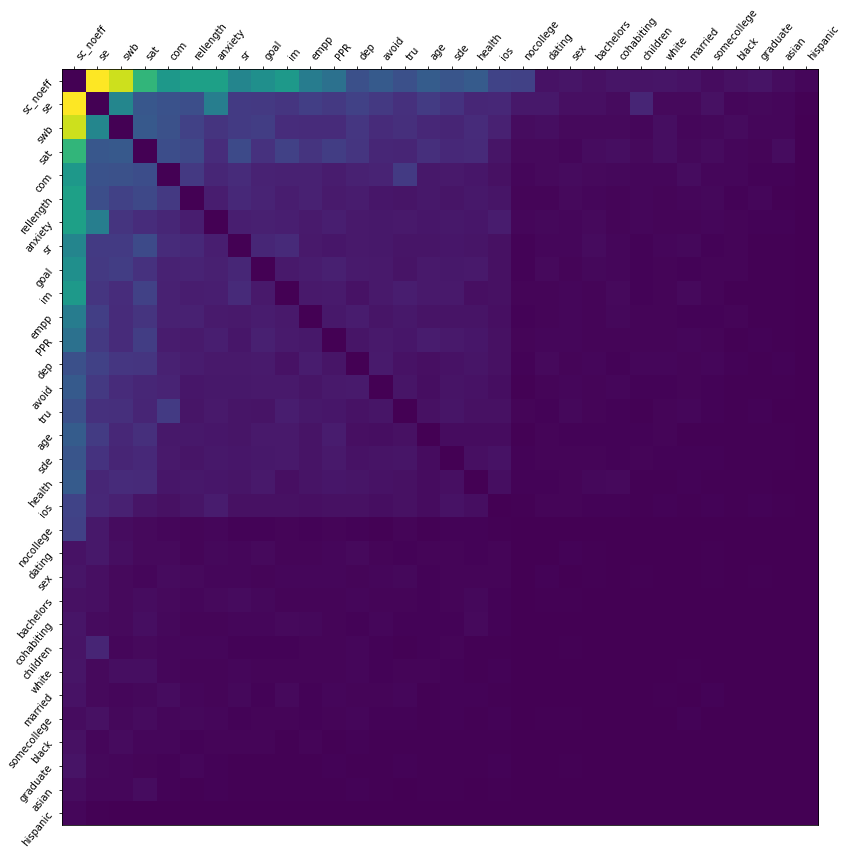

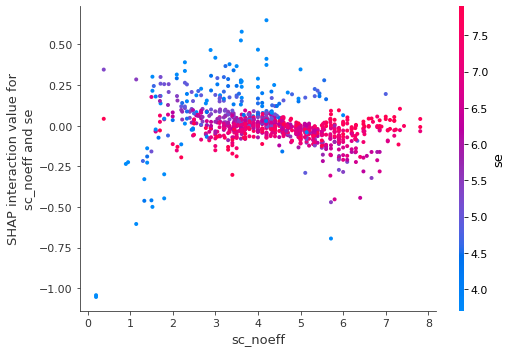

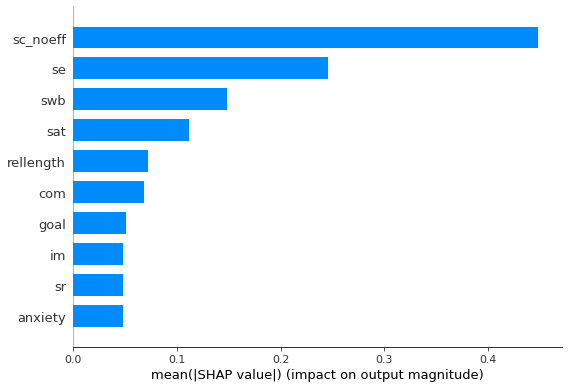

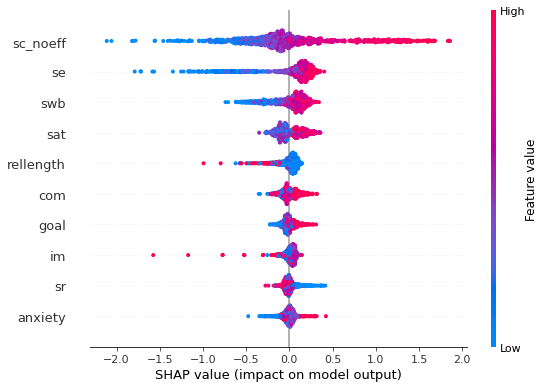

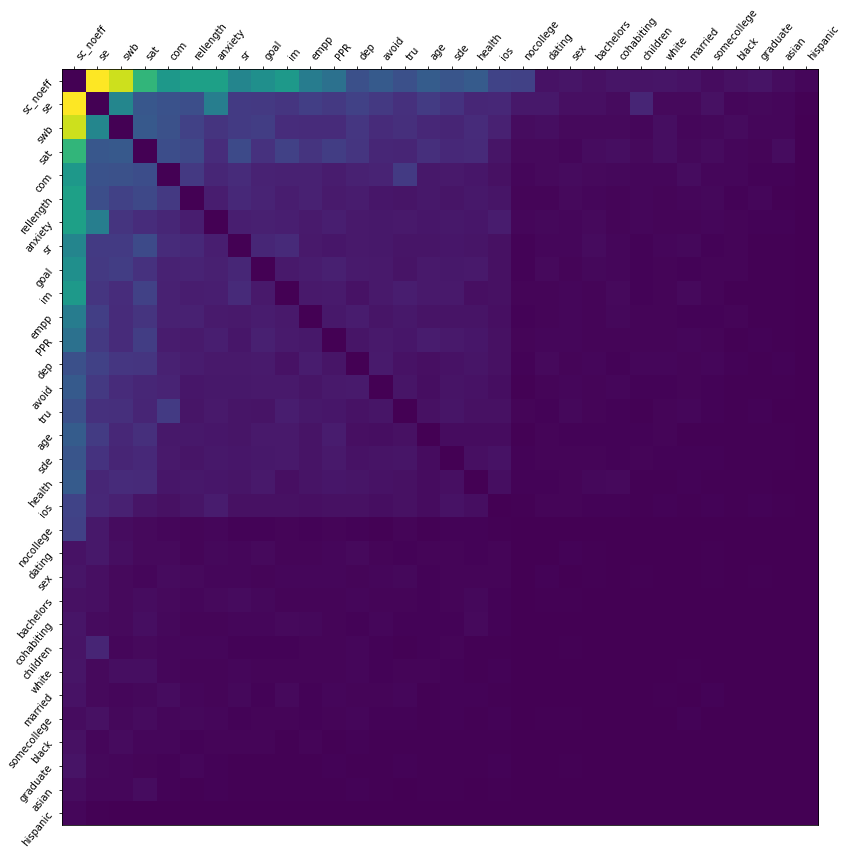

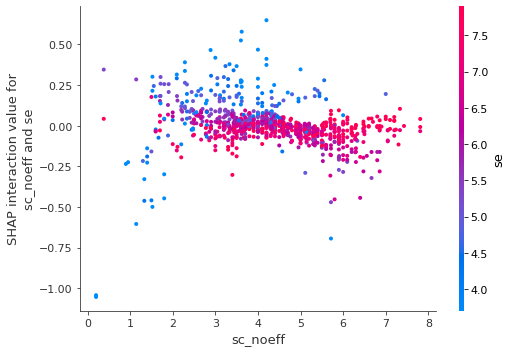

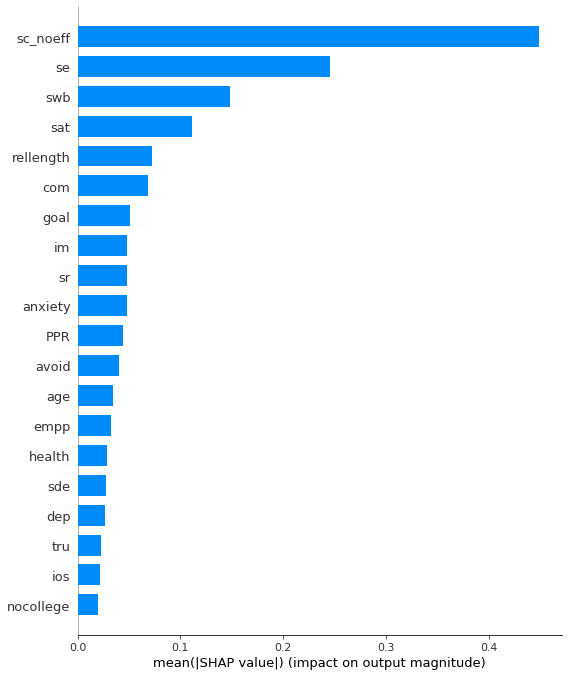

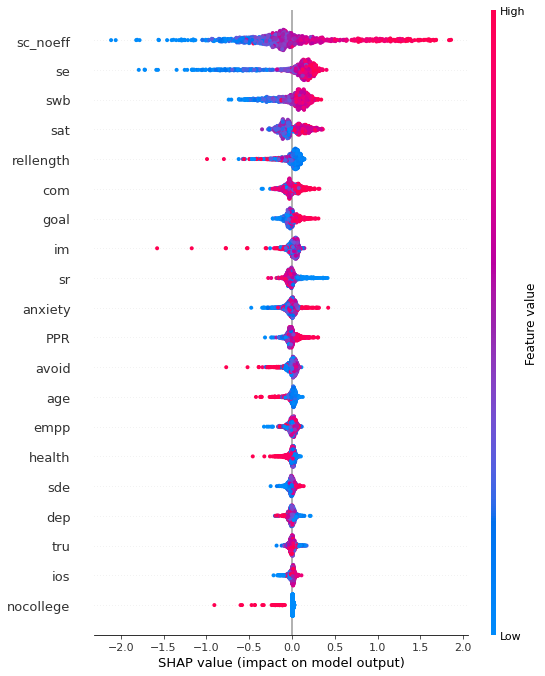

In [5]:
k = 10
outcome_var = 'eff'
ds = dataset.iloc[:, :44]

ds = ds[(ds['sample']!=5)]
remove_cols = ['sample', 'coupleid', 'ldprom', 'ldprev', 'conf', 'sac', 'scc', 'sdta', 'sdtr', 'sdtc', 'aff']

results_dir = os.path.join(od, outcome_var + '_A2')
make_folder(results_dir)
model_dir = os.path.join(od, 'model.sav')

shap_env = RFShap(model_dir=None, exclude_vars=remove_cols, outcome_var=outcome_var,
                  output_dir=results_dir, random_seed=42, class_=class_,type_='reg', balanced='balanced', trn_tst_split=trn_tst_split,
                    k_cv=k_cv, k=k)
ds, X, y, xtr, xts, ytr, ytst  = shap_env.munch(dataset=ds)

model = shap_env.make_model(config)
model, report = shap_env.train_test()
print(report)

explainer, shap_vals = shap_env.run_shap_explainer(model=model)


specific_var = None
interaction_vars = ['sc_noeff', 'se']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)

# shap_vals_bootstrap, results = shap_env.shap_bootstrap(model=model, retrain=False, n_bootstraps=500, n_samples=60, class_ind=0)

Preparing dataset...
Check if continuous or categorical variables: 
{'dating': True, 'cohabiting': True, 'married': True, 'rellength': False, 'children': True, 'sex': True, 'age': False, 'black': True, 'asian': True, 'white': True, 'hispanic': True, 'nocollege': True, 'somecollege': True, 'bachelors': True, 'graduate': True, 'sc_noeff': False, 'se': False, 'ldprom': False, 'ldprev': False, 'sr': False, 'sde': False, 'im': False, 'anxiety': False, 'avoid': False, 'health': False, 'swb': False, 'dep': False, 'empp': False, 'tru': False, 'com': False, 'sat': False, 'conf': False, 'sac': False, 'goal': False, 'ios': False, 'eff': False, 'PPR': False}
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  1
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)


Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


Training fold:  2
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  3
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  4
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  5
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  6
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  7
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  8
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  9
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  10
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Last row is the mean across columns.
    expl_var       mae       mse      msle    med_ae        r2
0   0.330211  1.144690  2.121132  0.095167  0.907950  0.324816
1   0.228474  1.2

model_output = "margin" has been renamed to model_output = "raw"
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


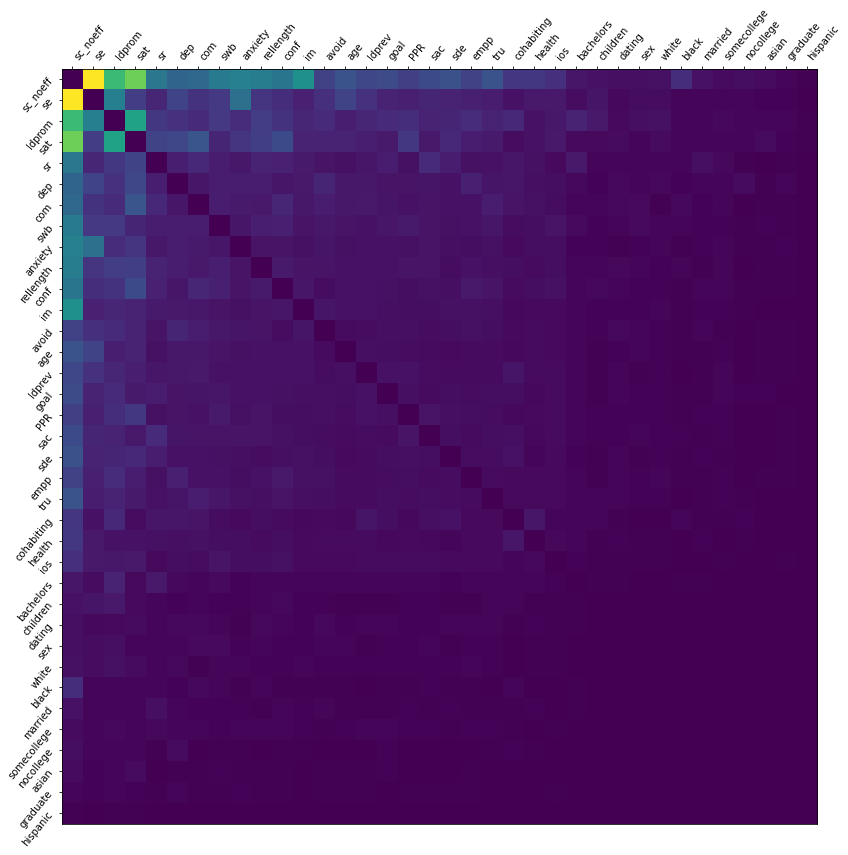

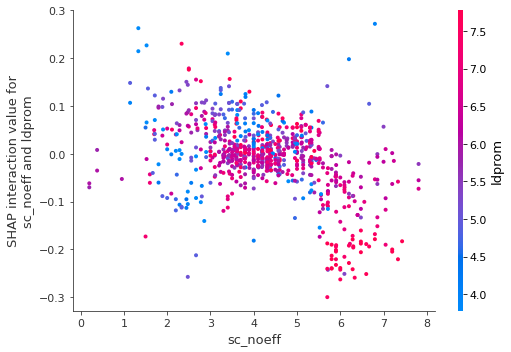

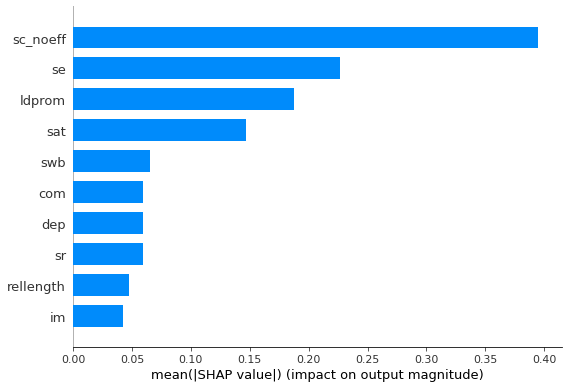

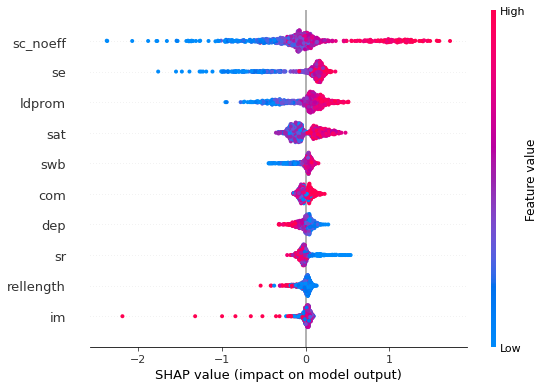

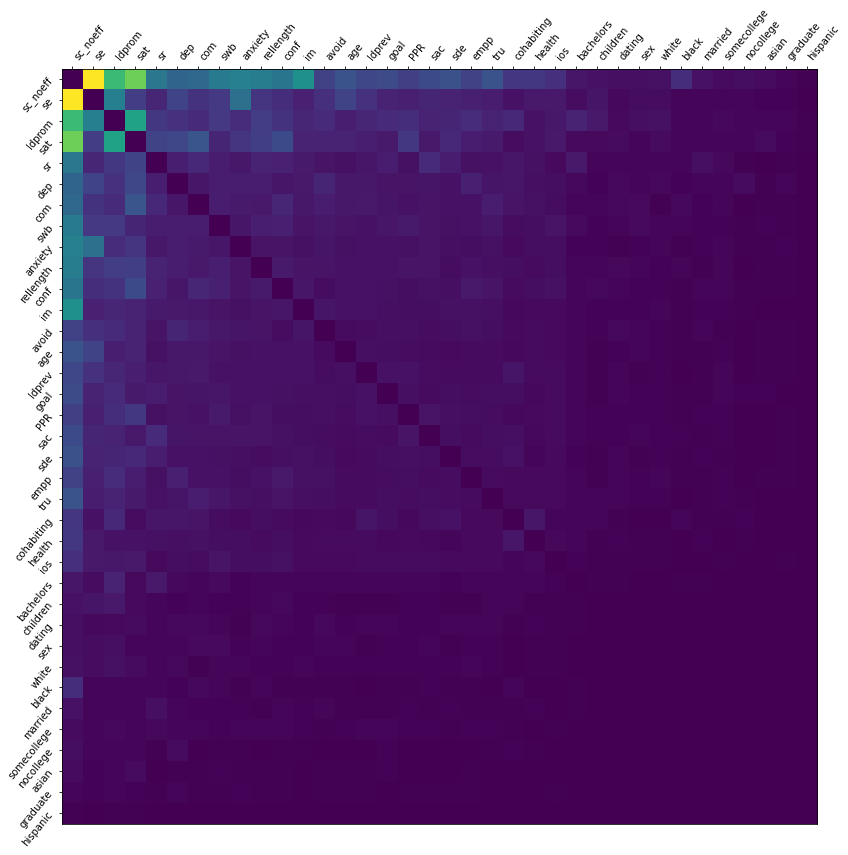

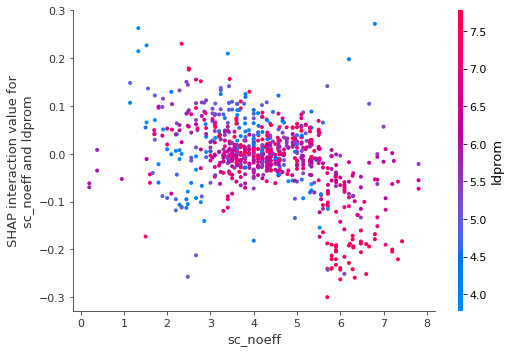

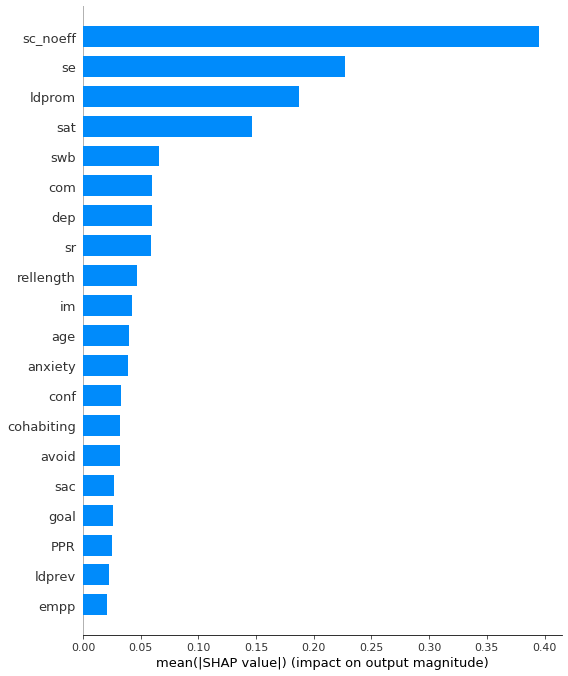

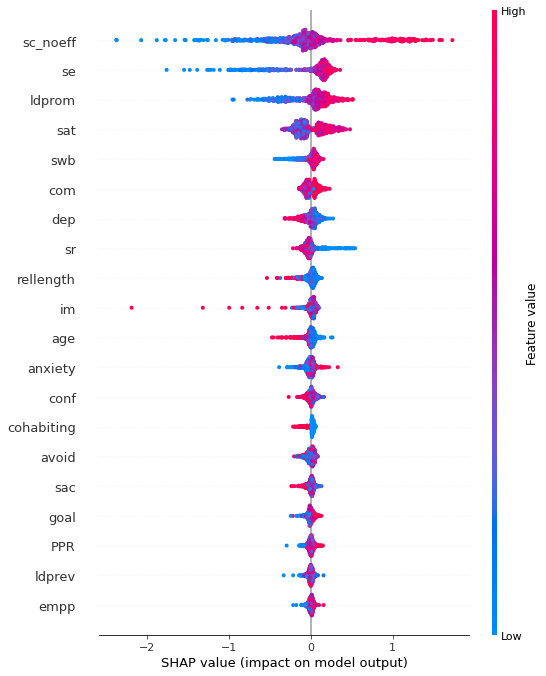

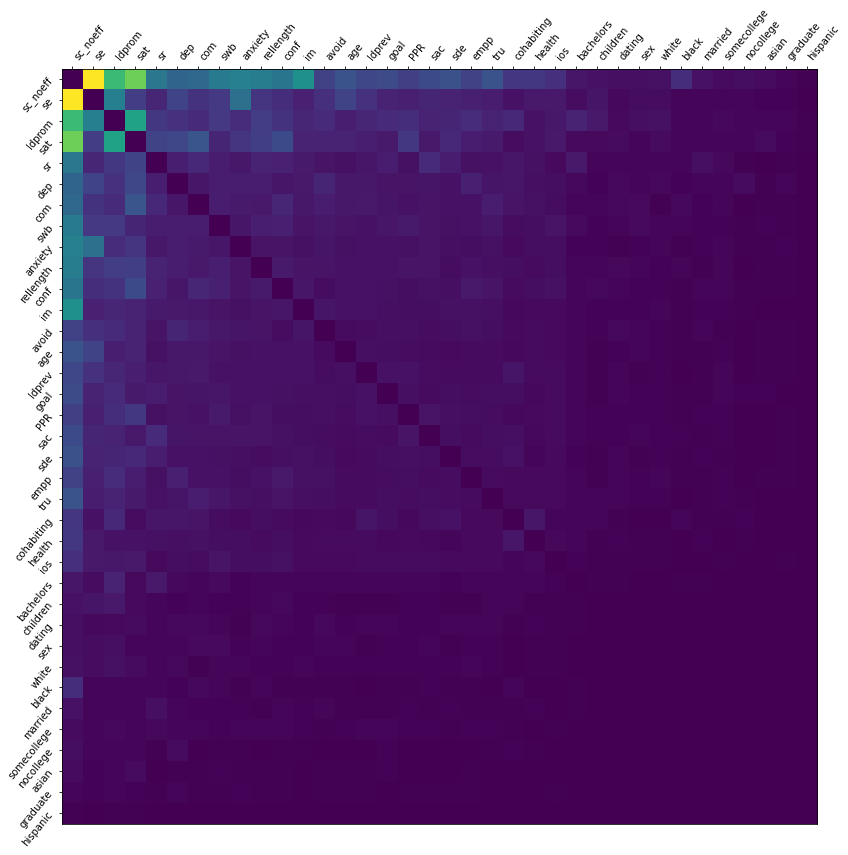

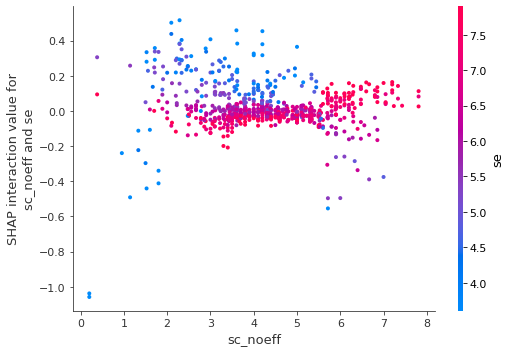

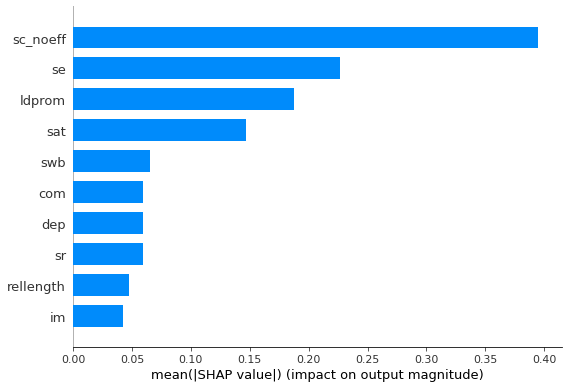

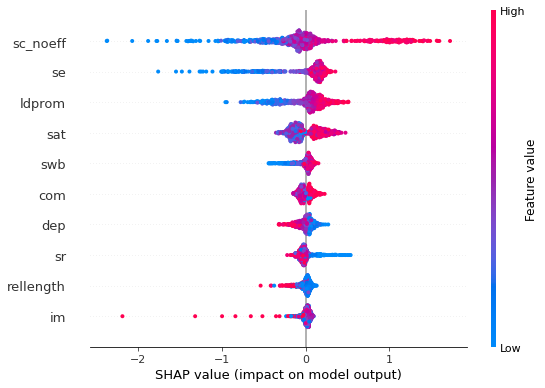

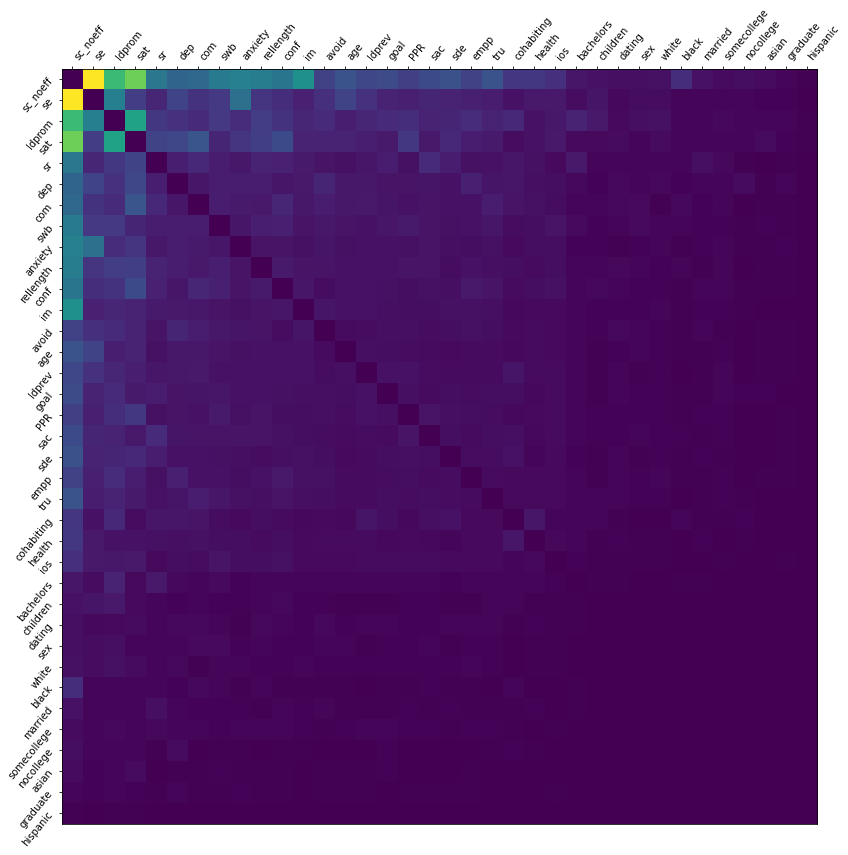

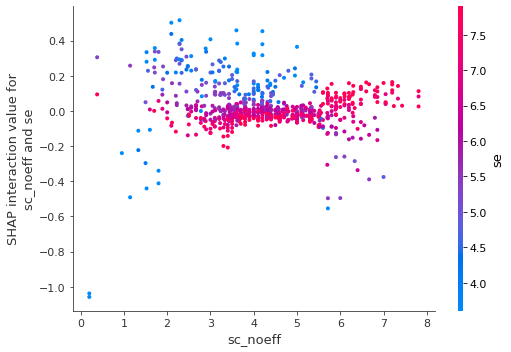

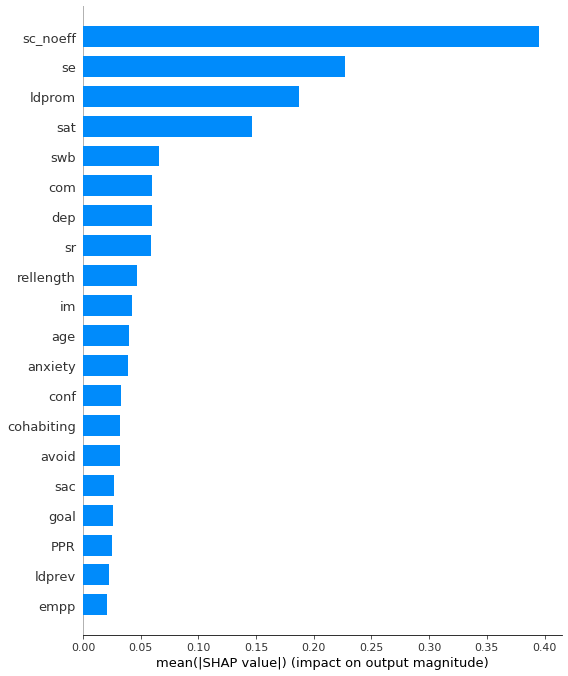

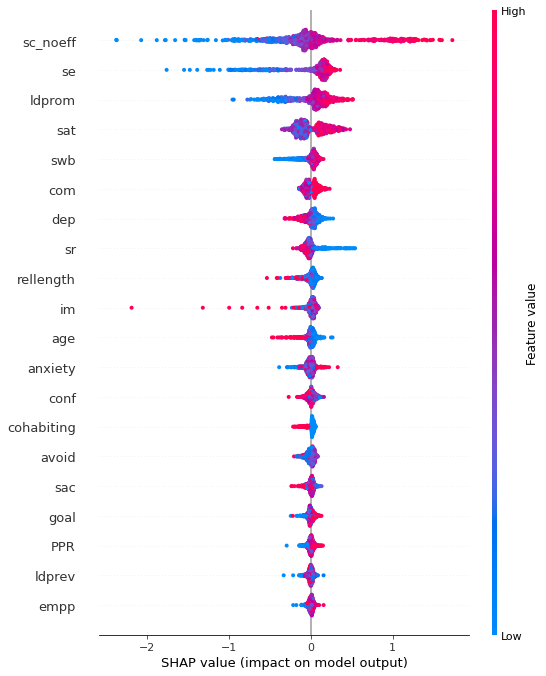

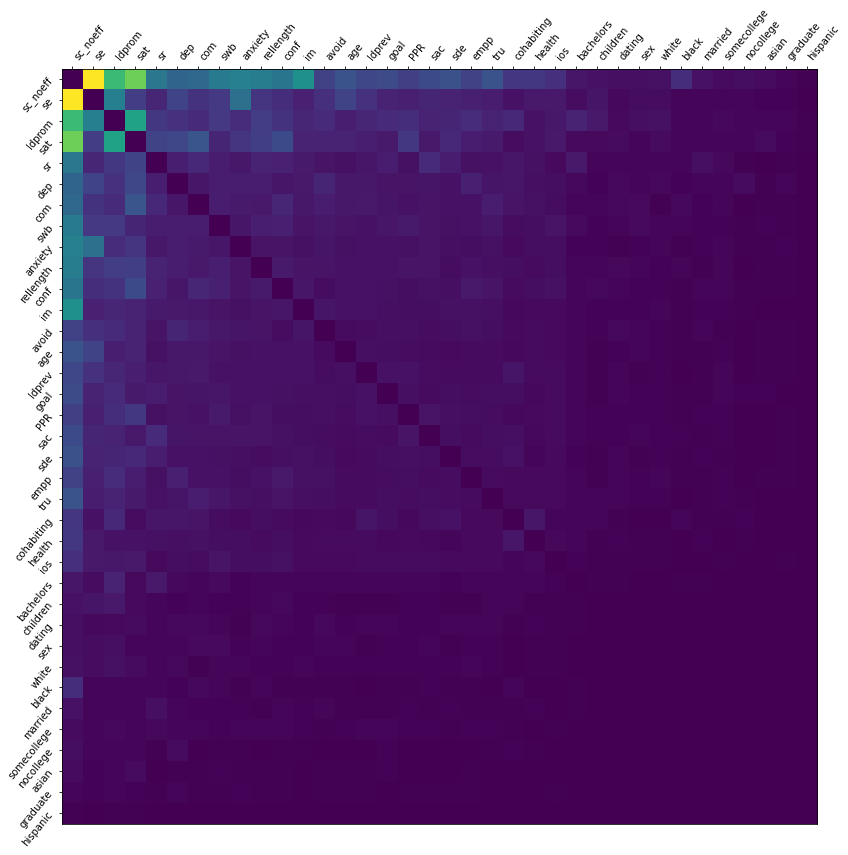

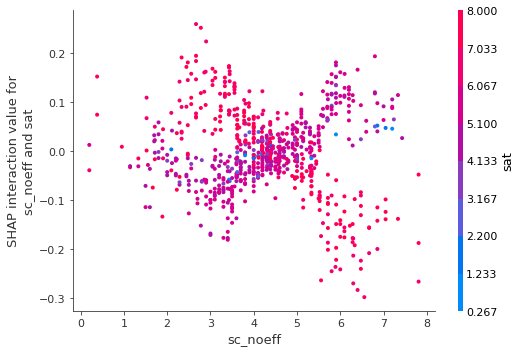

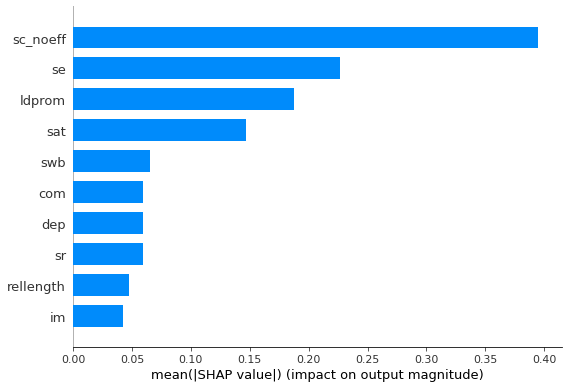

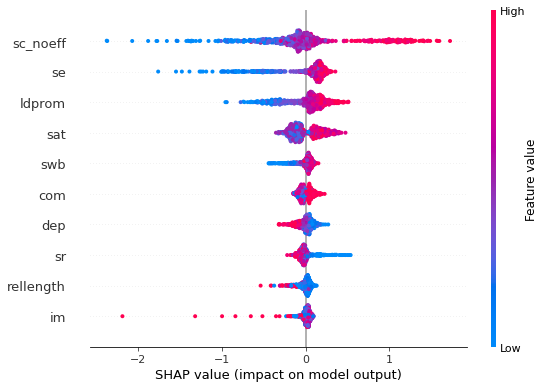

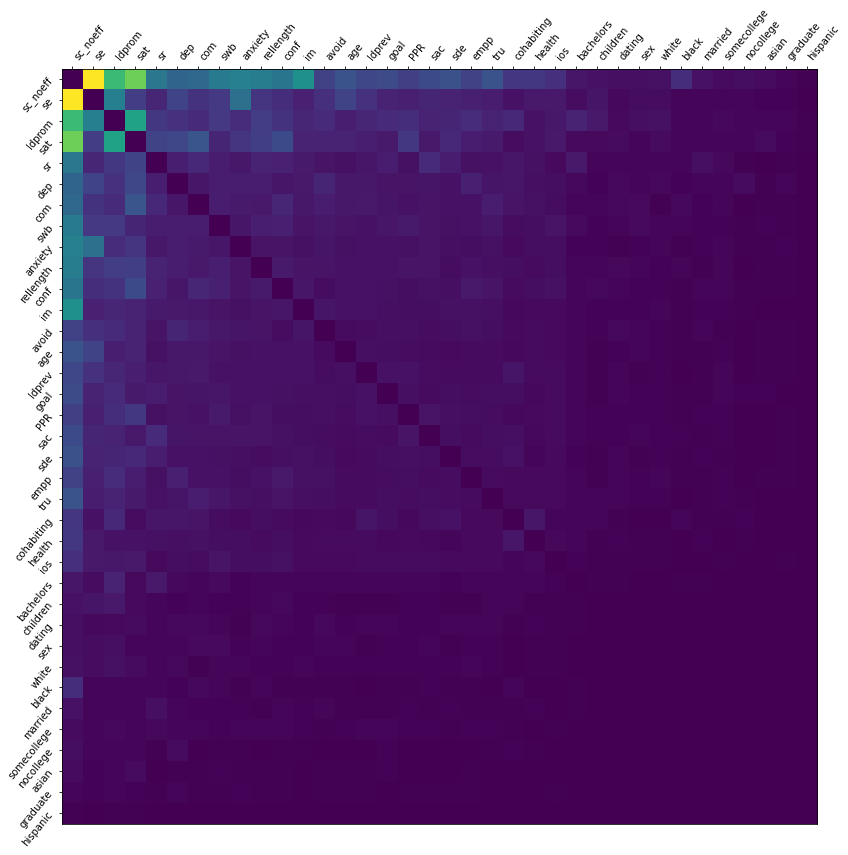

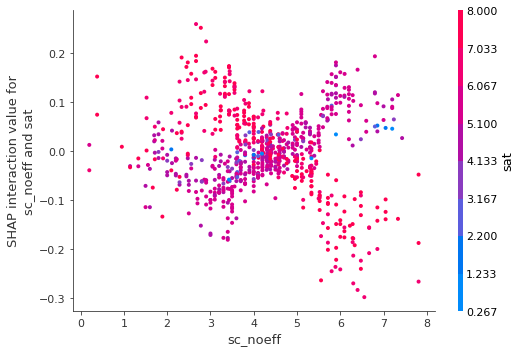

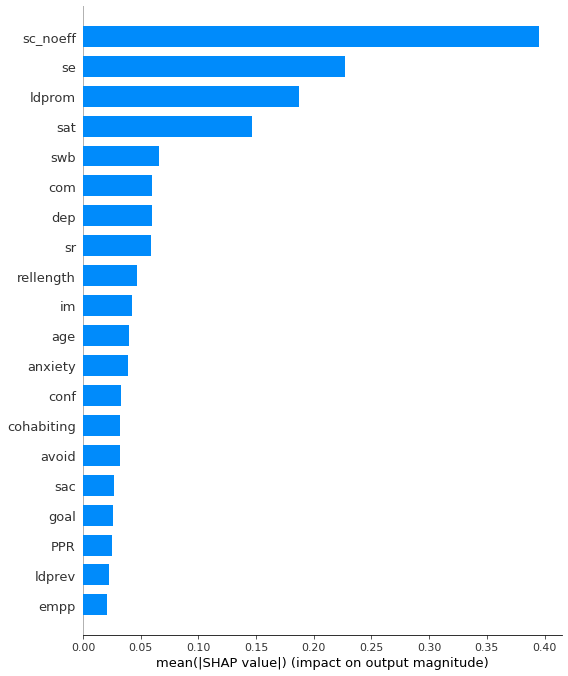

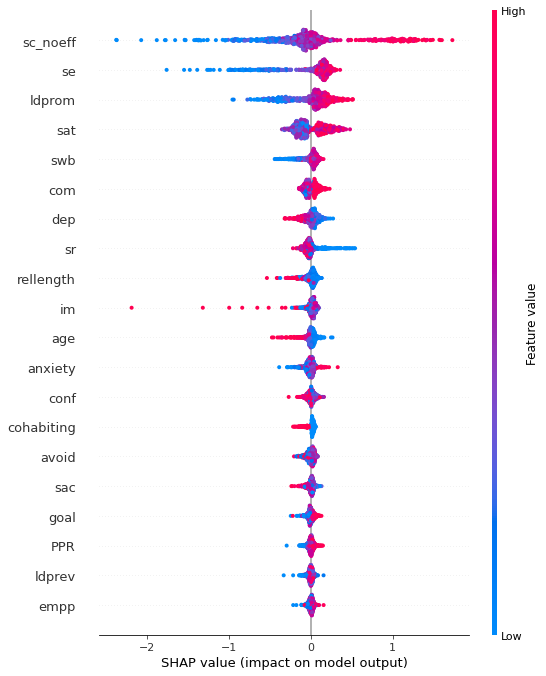

In [6]:
k = 10
outcome_var = 'eff'
ds = dataset.iloc[:, :44]

ds = ds[(ds['sample']<4)]
remove_cols = ['sample', 'coupleid', 'scc', 'sdta', 'sdtr', 'sdtc', 'aff']
results_dir = os.path.join(od, outcome_var + '_A3')
make_folder(results_dir)
model_dir = os.path.join(od, 'model.sav')

shap_env = RFShap(model_dir=None, exclude_vars=remove_cols, outcome_var=outcome_var,
                  output_dir=results_dir, random_seed=42, class_=class_,type_='reg', balanced='balanced', trn_tst_split=trn_tst_split,
                    k_cv=k_cv, k=k)
ds, X, y, xtr, xts, ytr, ytst  = shap_env.munch(dataset=ds)

model = shap_env.make_model(config)
model, report = shap_env.train_test()
print(report)

explainer, shap_vals = shap_env.run_shap_explainer(model=model)

specific_var = None
interaction_vars = ['sc_noeff', 'ldprom']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)
specific_var = None
interaction_vars = ['sc_noeff', 'se']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)
specific_var = None
interaction_vars = ['sc_noeff', 'sat']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)

# shap_vals_bootstrap, results = shap_env.shap_bootstrap(model=model, retrain=False, n_bootstraps=500, n_samples=60, class_ind=0)

Preparing dataset...
Check if continuous or categorical variables: 
{'dating': True, 'cohabiting': True, 'married': True, 'rellength': False, 'children': True, 'sex': True, 'age': False, 'black': True, 'asian': True, 'white': True, 'hispanic': True, 'nocollege': True, 'somecollege': True, 'bachelors': True, 'graduate': True, 'sc_noeff': False, 'se': False, 'sr': False, 'sde': False, 'im': False, 'anxiety': False, 'avoid': False, 'health': False, 'swb': False, 'dep': False, 'empp': False, 'tru': False, 'com': False, 'sat': False, 'ios': False, 'eff': False, 'aff': False}
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  1
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)


Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


Training fold:  2
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  3
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  4
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  5
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  6
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  7
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  8
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  9
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  10
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Last row is the mean across columns.
    expl_var       mae       mse      msle    med_ae        r2
0   0.308205  1.094648  1.695404  0.045742  1.002828  0.270449
1   0.224246  1.1

model_output = "margin" has been renamed to model_output = "raw"
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


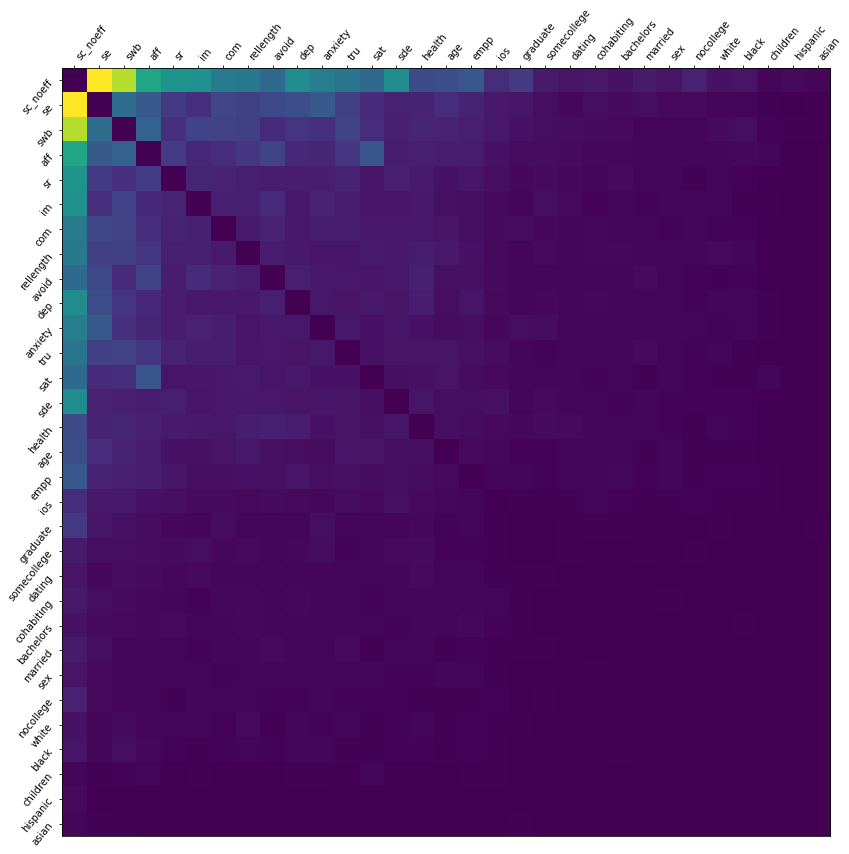

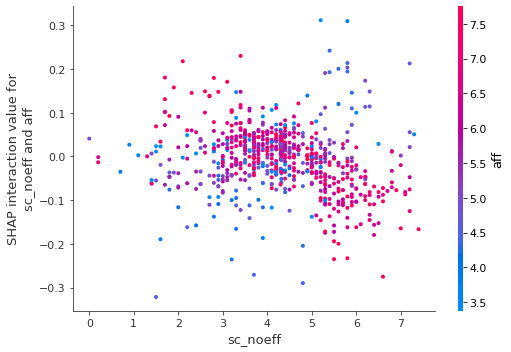

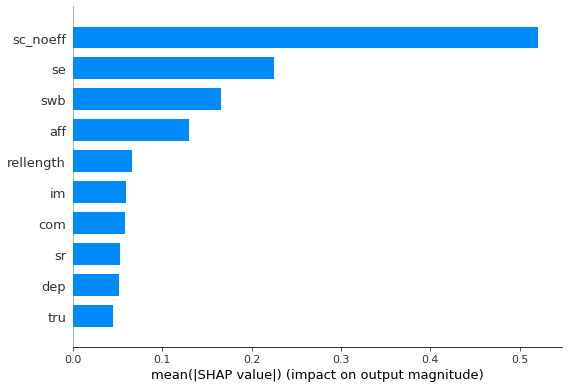

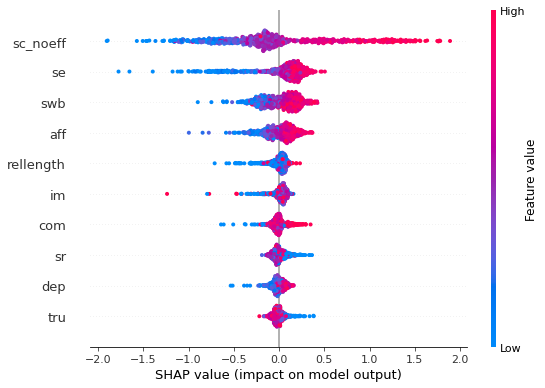

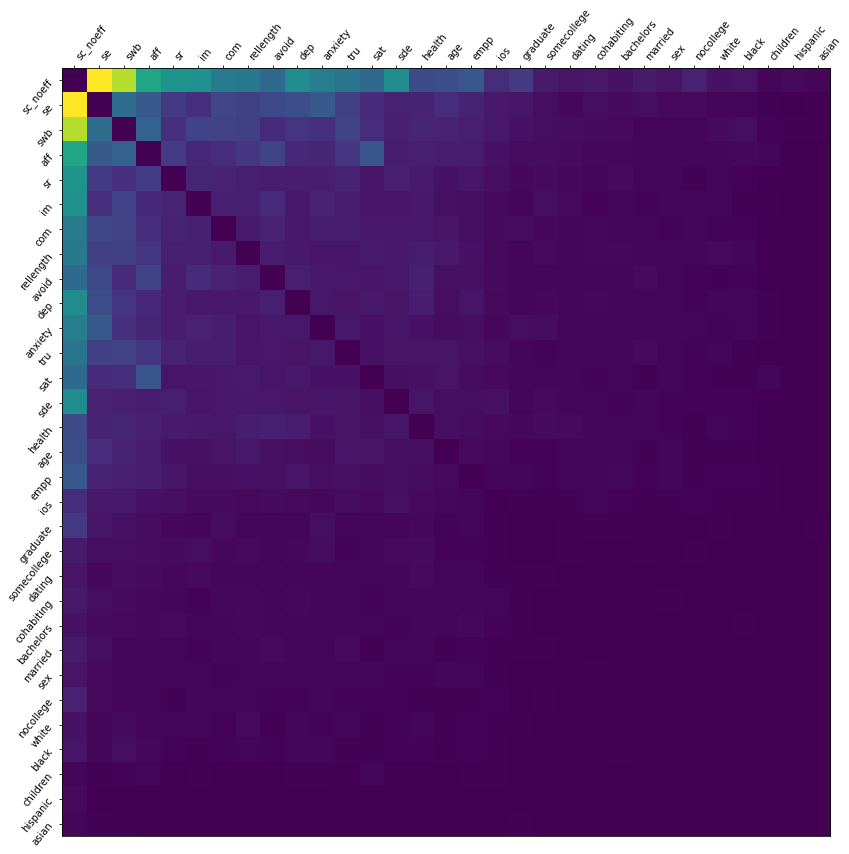

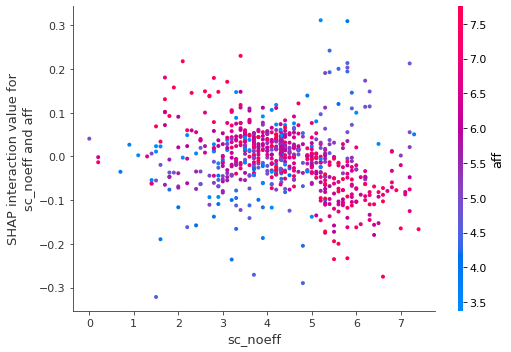

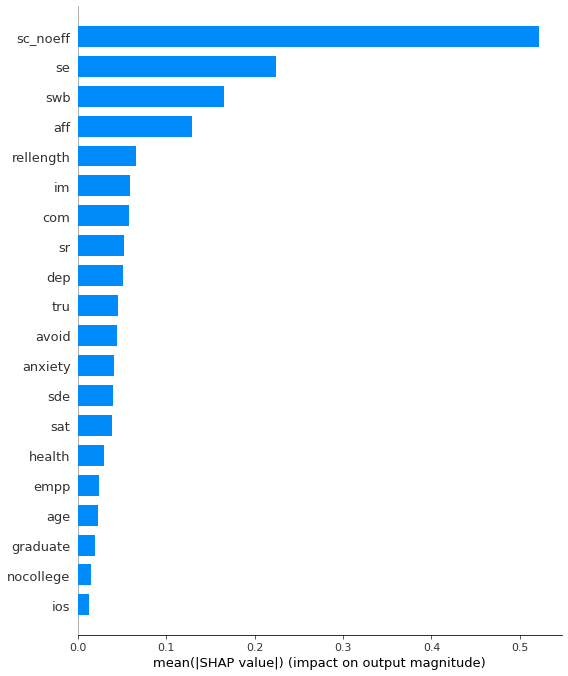

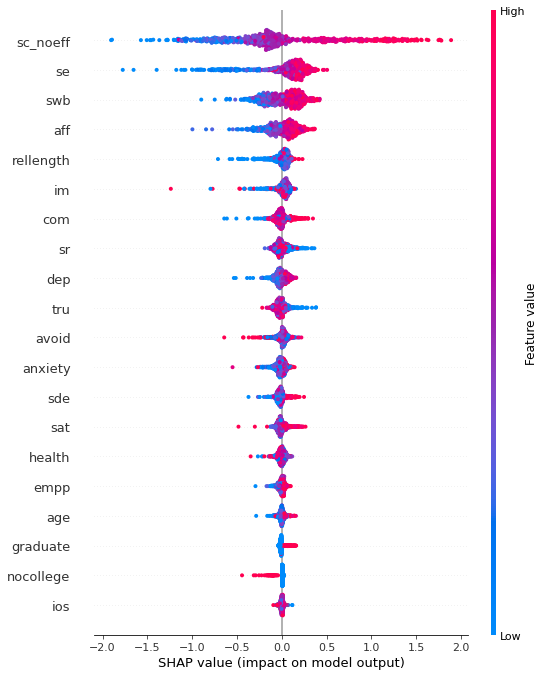

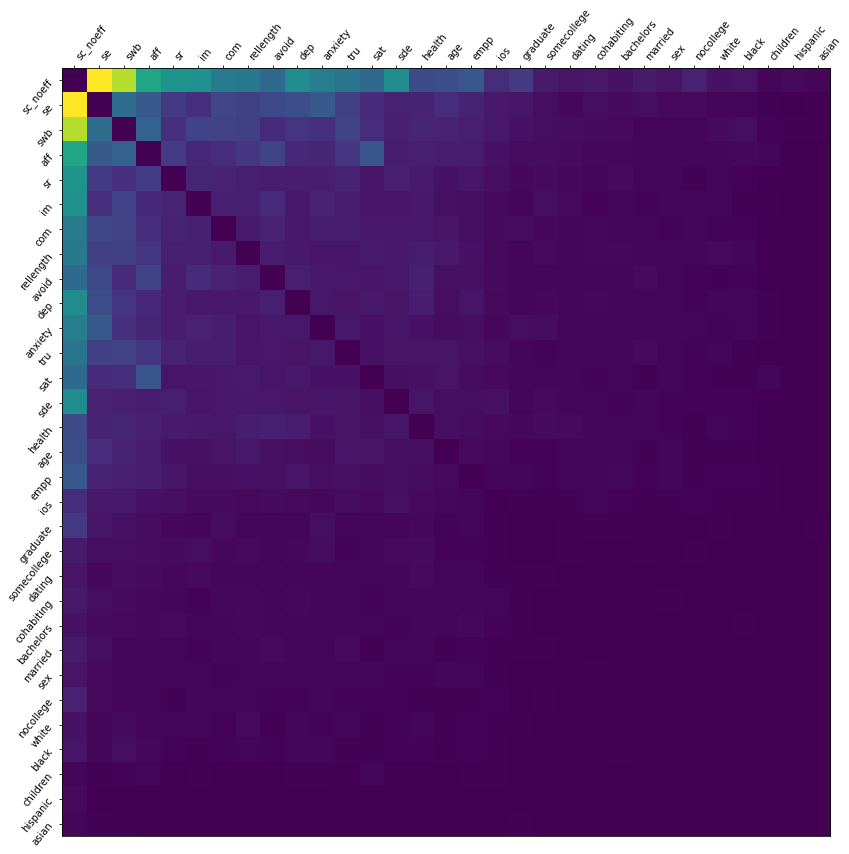

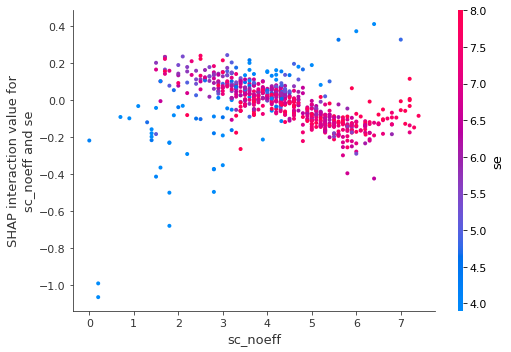

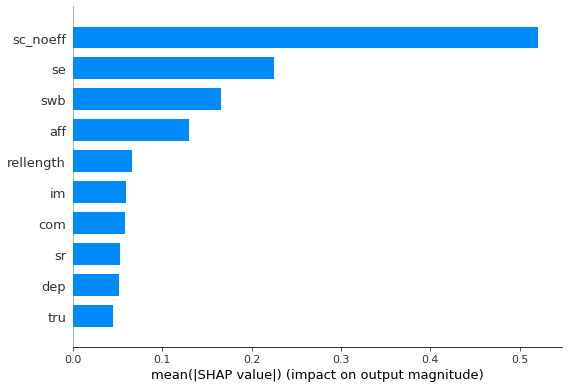

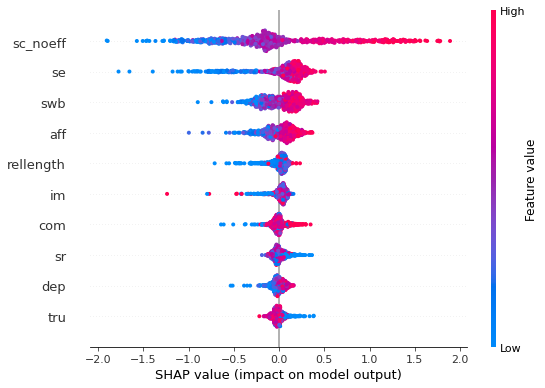

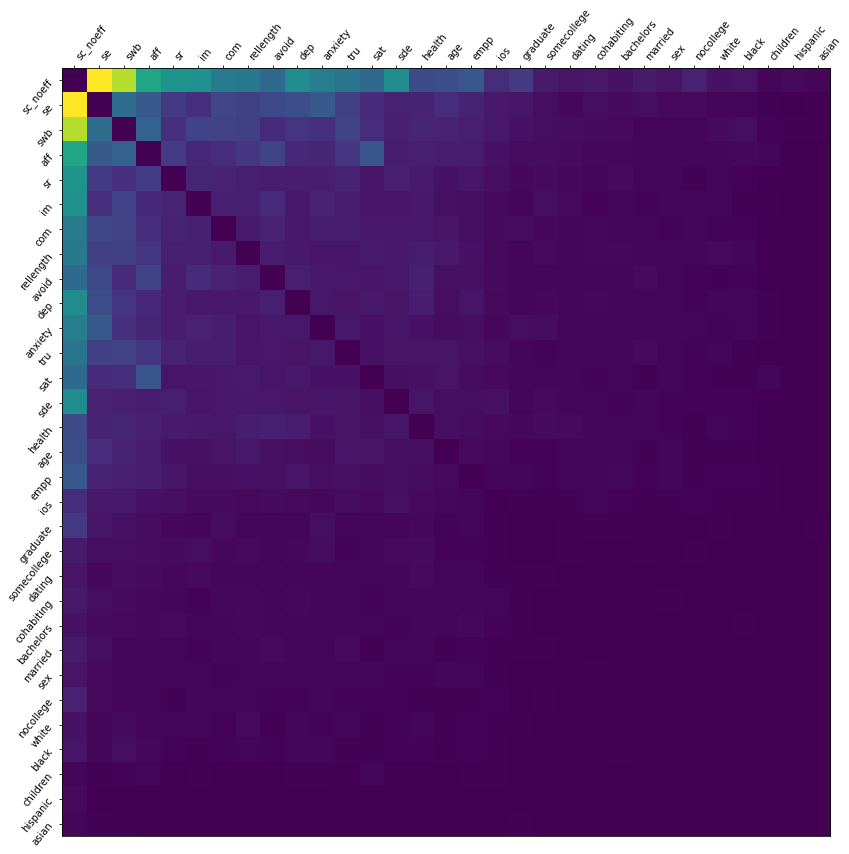

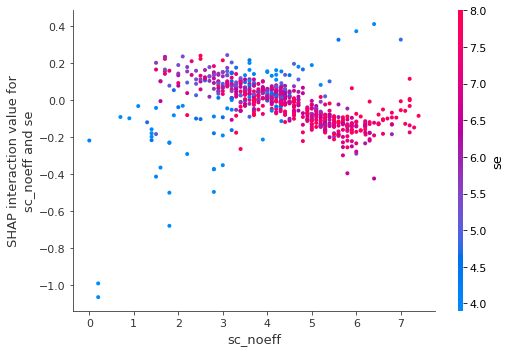

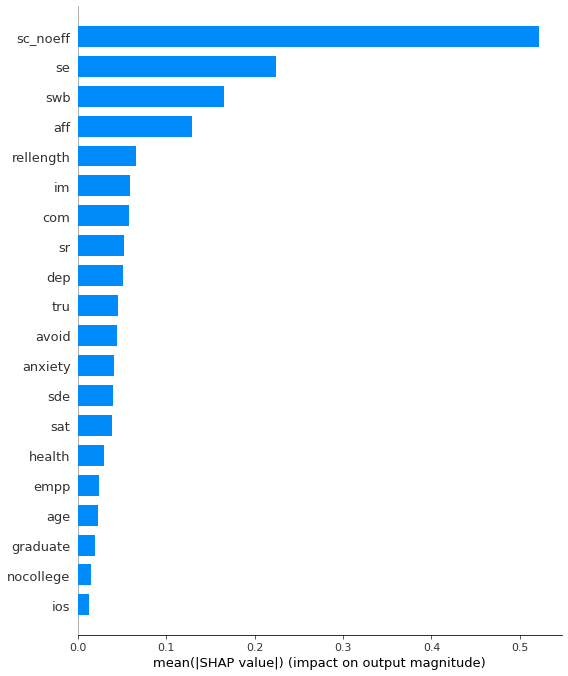

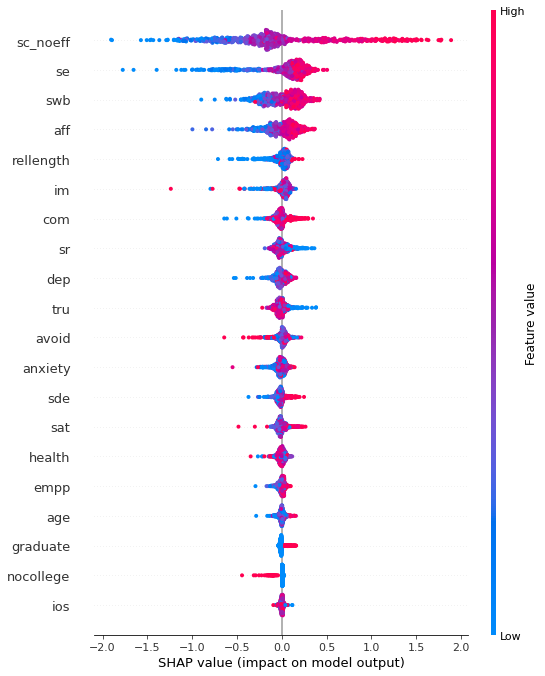

In [7]:
k = 10
outcome_var = 'eff'
ds = dataset.iloc[:, :44]

ds = ds[(ds['sample']>2)]
remove_cols = ['sample', 'coupleid', 'goal', 'PPR', 'ldprom', 'ldprev', 'conf', 'sac',
               'scc', 'sdta', 'sdtr', 'sdtc']
results_dir = os.path.join(od, outcome_var + '_A4')
make_folder(results_dir)
model_dir = os.path.join(od, 'model.sav')

shap_env = RFShap(model_dir=None, exclude_vars=remove_cols, outcome_var=outcome_var,
                  output_dir=results_dir, random_seed=42, class_=class_,type_='reg', balanced='balanced', trn_tst_split=trn_tst_split,
                    k_cv=k_cv, k=k)
ds, X, y, xtr, xts, ytr, ytst  = shap_env.munch(dataset=ds)

model = shap_env.make_model(config)
model, report = shap_env.train_test()
print(report)

explainer, shap_vals = shap_env.run_shap_explainer(model=model)

specific_var = None
interaction_vars = ['sc_noeff', 'aff']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)
specific_var = None
interaction_vars = ['sc_noeff', 'se']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)

# shap_vals_bootstrap, results = shap_env.shap_bootstrap(model=model, retrain=False, n_bootstraps=500, n_samples=60, class_ind=0)

In [ ]:
k = 10
outcome_var = 'eff'

remove_cols = ['sample','coupleid', 'goal', 'PPR', 'ldprom', 'ldprev', 'conf', 'sac',
               'scc', 'sdta', 'sdtr', 'sdtc', 'aff', 'bgoal', 'bPPR',
               'bldprom', 'bldprev', 'bconf', 'bsac', 'bscc', 'bsdta',
               'bsdtr', 'bsdtc', 'b_aff']

results_dir = os.path.join(od, outcome_var + '_AP1')
make_folder(results_dir)
model_dir = os.path.join(od, 'model.sav')

shap_env = RFShap(model_dir=None, exclude_vars=remove_cols, outcome_var=outcome_var,
                  output_dir=results_dir, random_seed=42, class_=class_,type_='reg', balanced='balanced', trn_tst_split=trn_tst_split,
                    k_cv=k_cv, k=k)
ds, X, y, xtr, xts, ytr, ytst  = shap_env.munch(dataset=dataset)

model = shap_env.make_model(config)
model, report = shap_env.train_test()
print(report)

explainer, shap_vals = shap_env.run_shap_explainer(model=model)


specific_var = None
interaction_vars = ['sc_noeff', 'se']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)

# shap_vals_bootstrap, results = shap_env.shap_bootstrap(model=model, retrain=False, n_bootstraps=500, n_samples=60, class_ind=0)

Preparing dataset...
Check if continuous or categorical variables: 
{'dating': True, 'cohabiting': True, 'married': True, 'rellength': False, 'children': True, 'sex': True, 'age': False, 'black': True, 'asian': True, 'white': True, 'hispanic': True, 'nocollege': True, 'somecollege': True, 'bachelors': True, 'graduate': True, 'sc_noeff': False, 'se': False, 'sr': False, 'sde': False, 'im': False, 'anxiety': False, 'avoid': False, 'health': False, 'swb': False, 'dep': False, 'empp': False, 'tru': False, 'com': False, 'sat': False, 'goal': False, 'ios': False, 'eff': False, 'PPR': False, 'bsex': True, 'bage': False, 'bblack': True, 'basian': True, 'bwhite': True, 'bhispanic': True, 'bnocollege': True, 'bsomecollege': True, 'bbachelors': True, 'bgraduate': True, 'bsc_noeff': False, 'bse': False, 'bsr': False, 'bsde': False, 'bim': False, 'banxiety': False, 'bavoid': False, 'bhealth': False, 'bswb': False, 'bdep': False, 'bempp': False, 'btru': False, 'bcom': False, 'bsat': False, 'bgoal': 

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


Training fold:  2
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  3
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  4
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  5
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  6
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  7
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  8
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  9
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  10
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Last row is the mean across columns.
    expl_var       mae       mse      msle    med_ae        r2
0   0.369778  1.136160  2.023485  0.065584  0.970000  0.366726
1   0.299948  0.9

model_output = "margin" has been renamed to model_output = "raw"
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


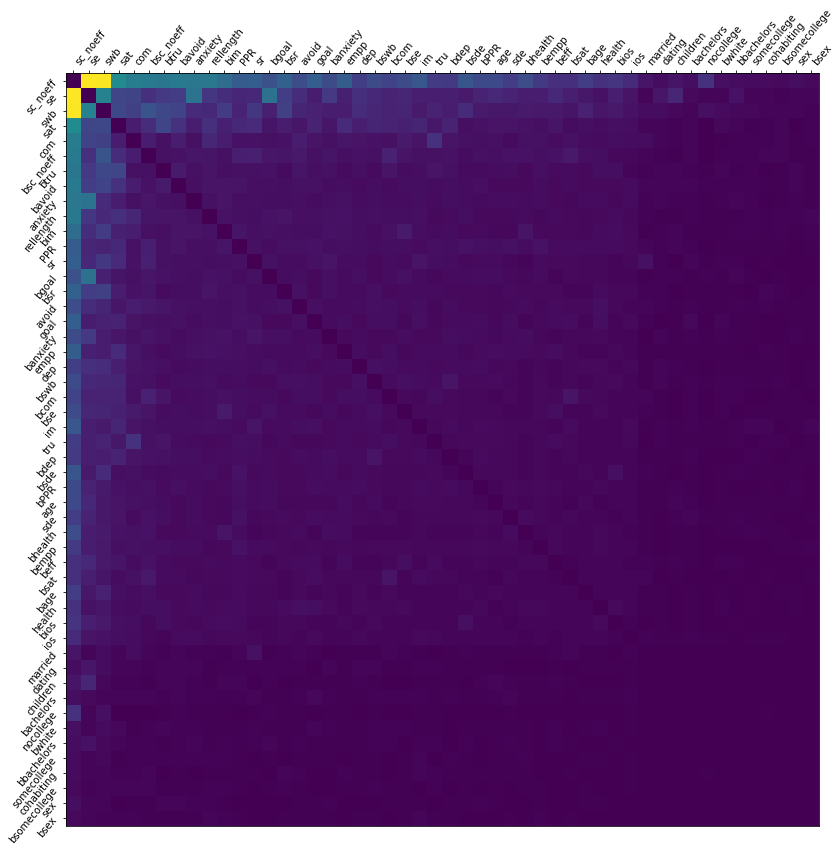

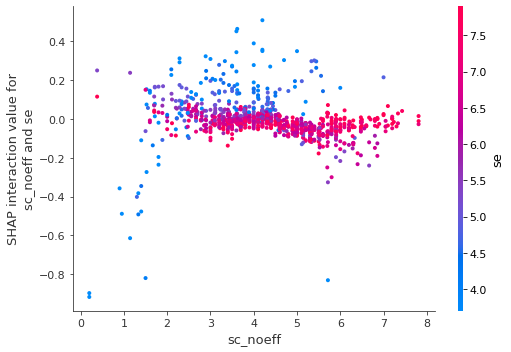

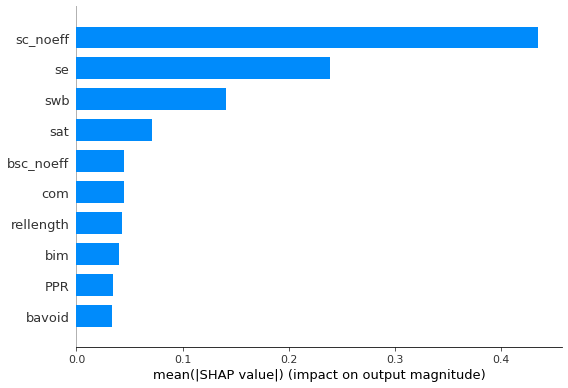

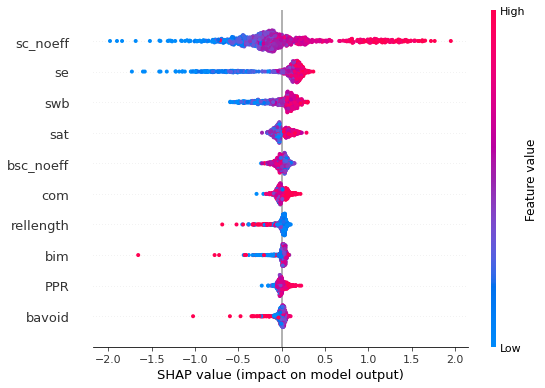

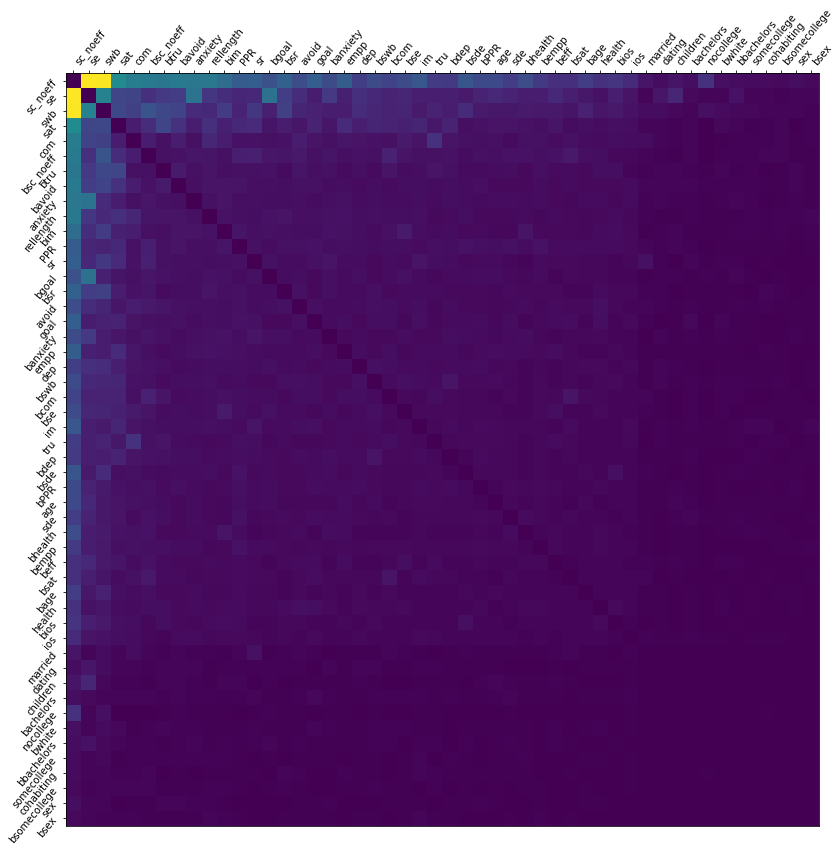

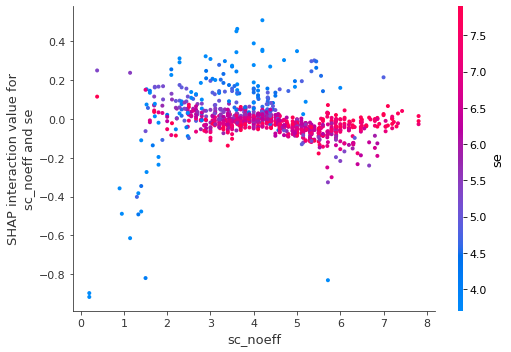

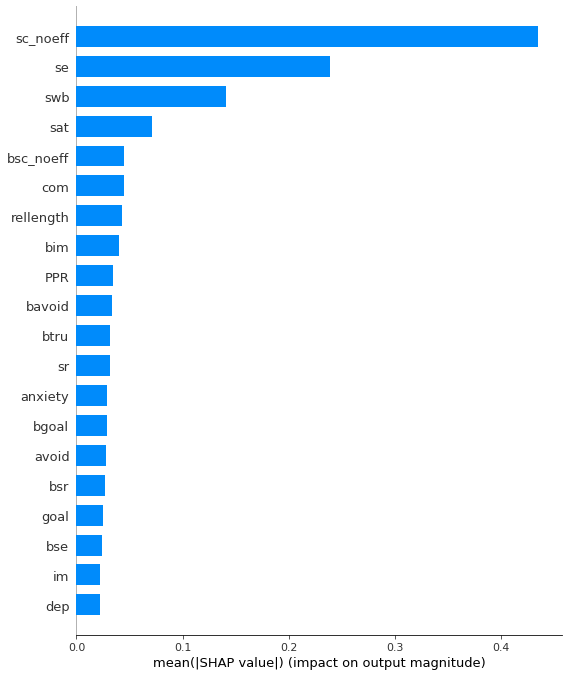

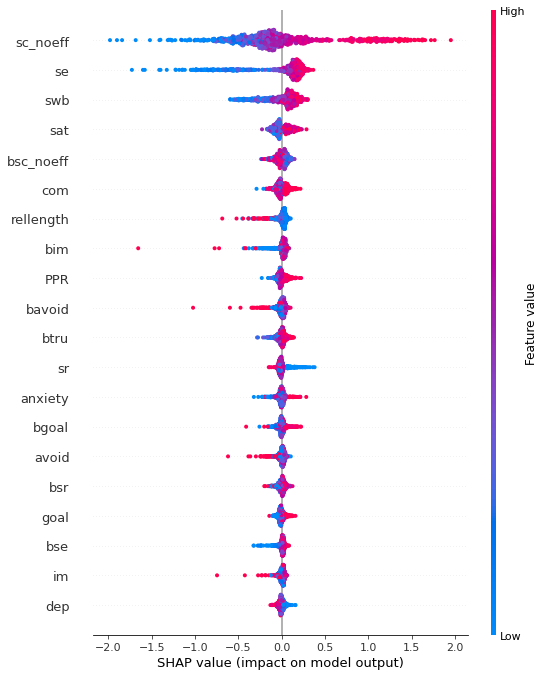

In [8]:
k = 10
outcome_var = 'eff'
ds = dataset[(dataset['sample']!=5)]
remove_cols = ['sample', 'coupleid', 'ldprom', 'ldprev', 'conf', 'sac', 'scc',
               'sdta', 'sdtr', 'sdtc', 'aff', 'bldprom', 'bldprev',
               'bconf', 'bsac', 'bscc', 'bsdta', 'bsdtr', 'bsdtc', 'b_aff']

results_dir = os.path.join(od, outcome_var + '_AP2')
make_folder(results_dir)
model_dir = os.path.join(od, 'model.sav')

shap_env = RFShap(model_dir=None, exclude_vars=remove_cols, outcome_var=outcome_var,
                  output_dir=results_dir, random_seed=42, class_=class_,type_='reg', balanced='balanced', trn_tst_split=trn_tst_split,
                    k_cv=k_cv, k=k)
ds, X, y, xtr, xts, ytr, ytst  = shap_env.munch(dataset=ds)

model = shap_env.make_model(config)
model, report = shap_env.train_test()
print(report)

explainer, shap_vals = shap_env.run_shap_explainer(model=model)


specific_var = None
interaction_vars = ['sc_noeff', 'se']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)

# shap_vals_bootstrap, results = shap_env.shap_bootstrap(model=model, retrain=False, n_bootstraps=500, n_samples=60, class_ind=0)

Preparing dataset...
Check if continuous or categorical variables: 
{'dating': True, 'cohabiting': True, 'married': True, 'rellength': False, 'children': True, 'sex': True, 'age': False, 'black': True, 'asian': True, 'white': True, 'hispanic': True, 'nocollege': True, 'somecollege': True, 'bachelors': True, 'graduate': True, 'sc_noeff': False, 'se': False, 'ldprom': False, 'ldprev': False, 'sr': False, 'sde': False, 'im': False, 'anxiety': False, 'avoid': False, 'health': False, 'swb': False, 'dep': False, 'empp': False, 'tru': False, 'com': False, 'sat': False, 'conf': False, 'sac': False, 'goal': False, 'ios': False, 'eff': False, 'PPR': False, 'bsex': True, 'bage': False, 'bblack': True, 'basian': True, 'bwhite': True, 'bhispanic': True, 'bnocollege': True, 'bsomecollege': True, 'bbachelors': True, 'bgraduate': True, 'bsc_noeff': False, 'bse': False, 'bldprom': False, 'bldprev': False, 'bsr': False, 'bsde': False, 'bim': False, 'banxiety': False, 'bavoid': False, 'bhealth': False, '

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


Training fold:  2
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  3
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  4
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  5
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  6
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  7
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  8
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  9
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  10
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Last row is the mean across columns.
    expl_var       mae       mse      msle    med_ae        r2
0   0.360506  1.125604  2.044075  0.090891  0.922394  0.349345
1   0.255383  1.2

model_output = "margin" has been renamed to model_output = "raw"
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


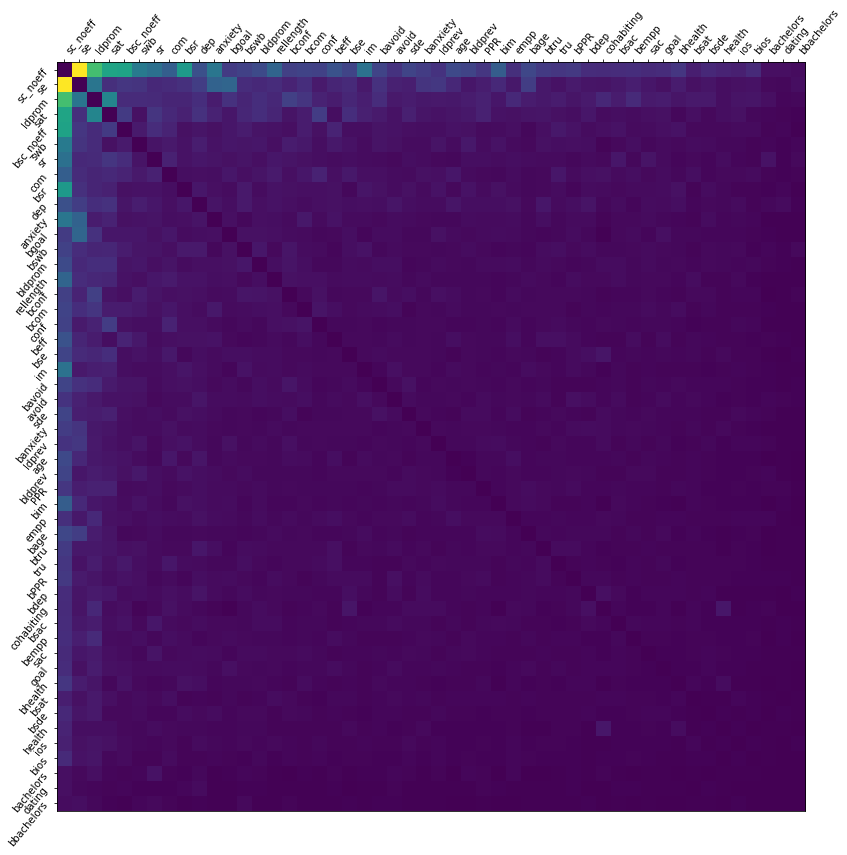

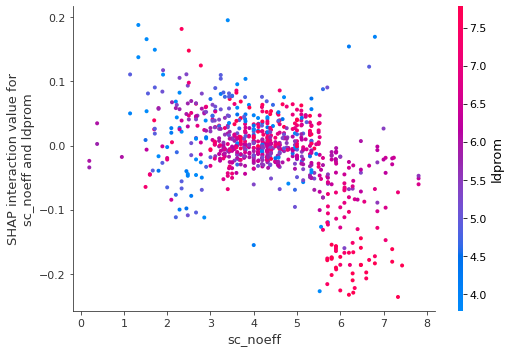

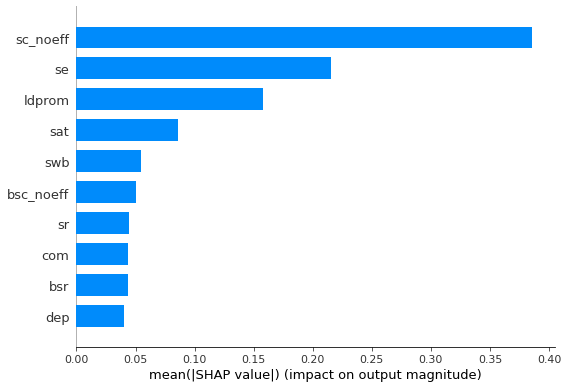

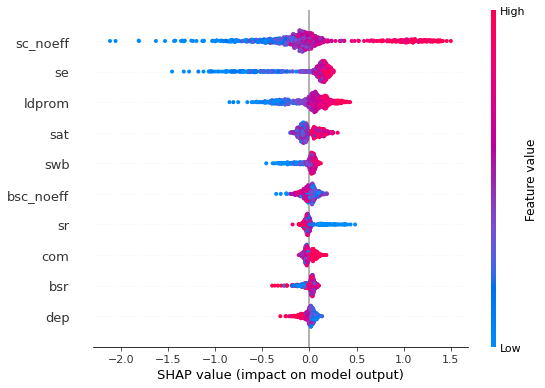

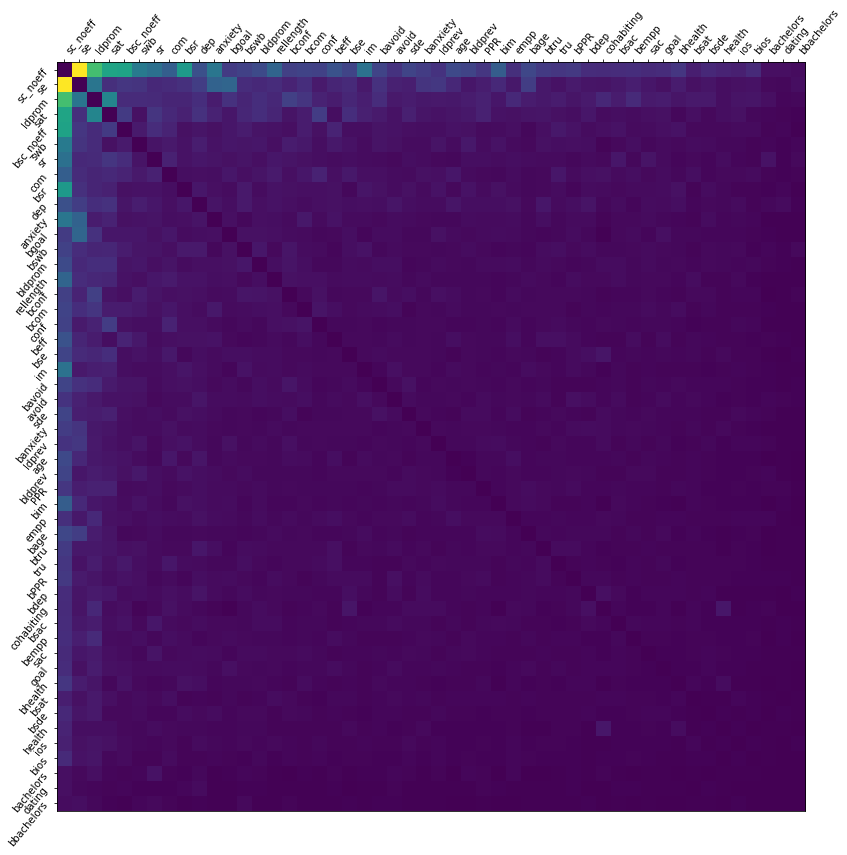

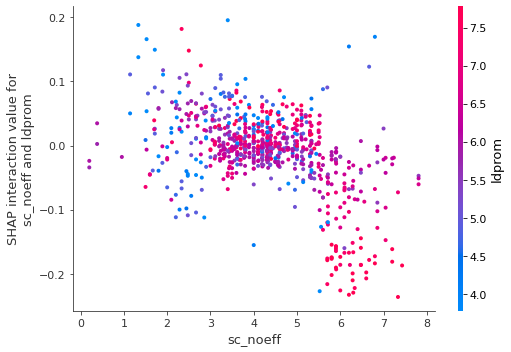

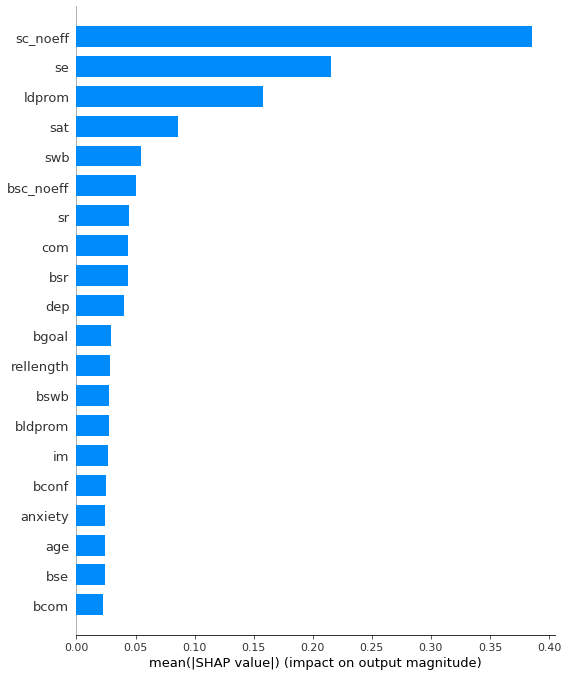

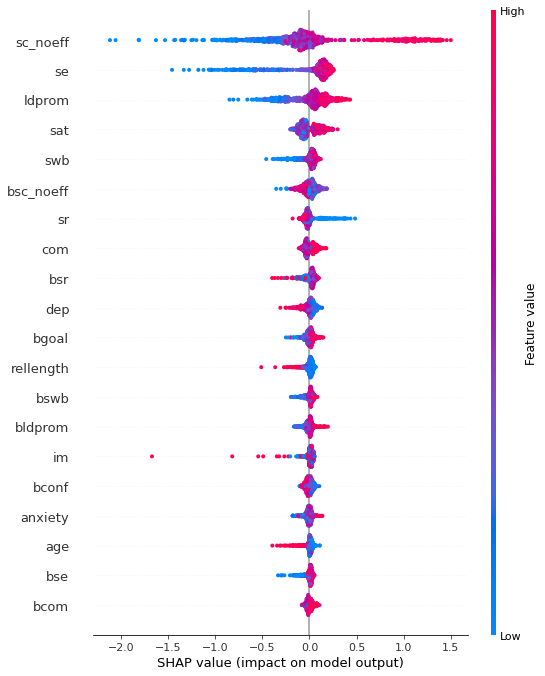

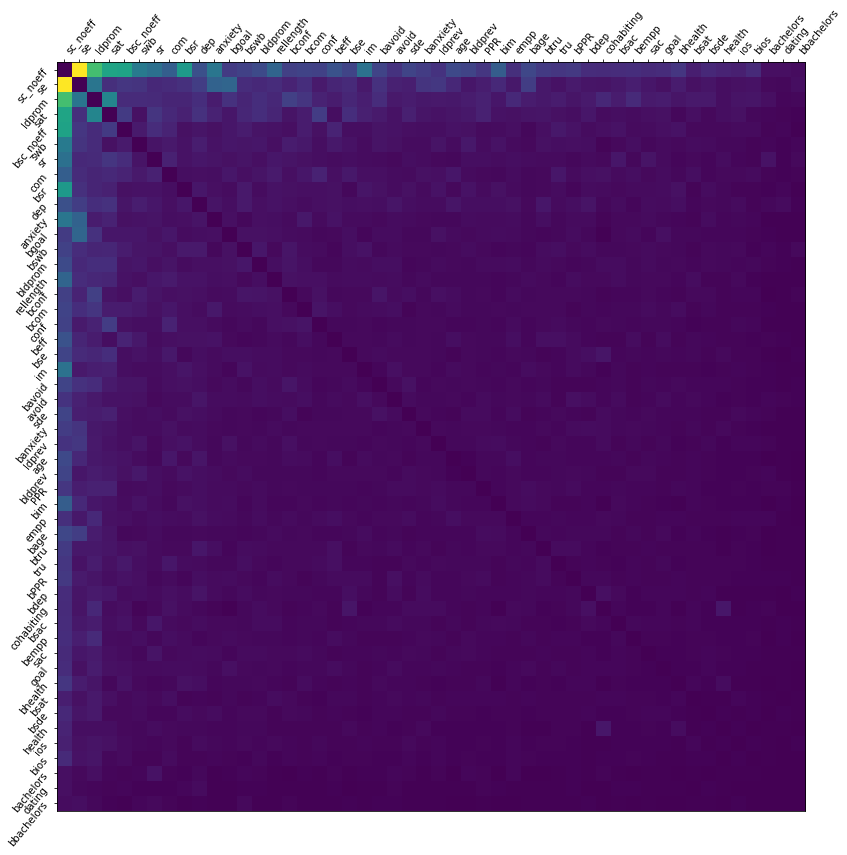

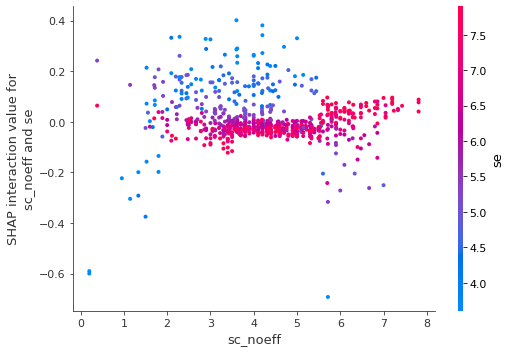

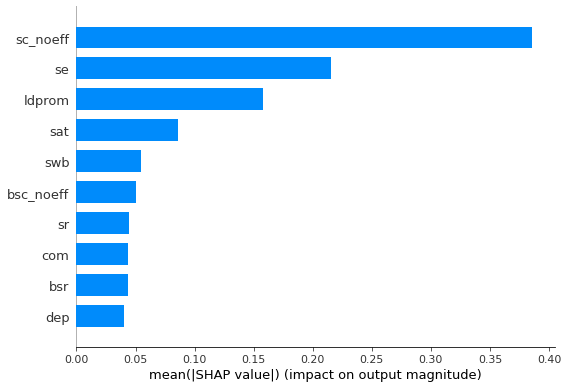

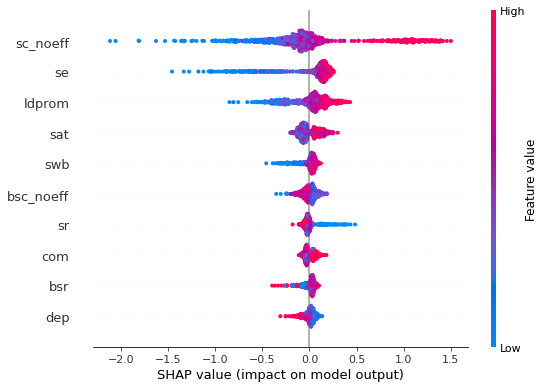

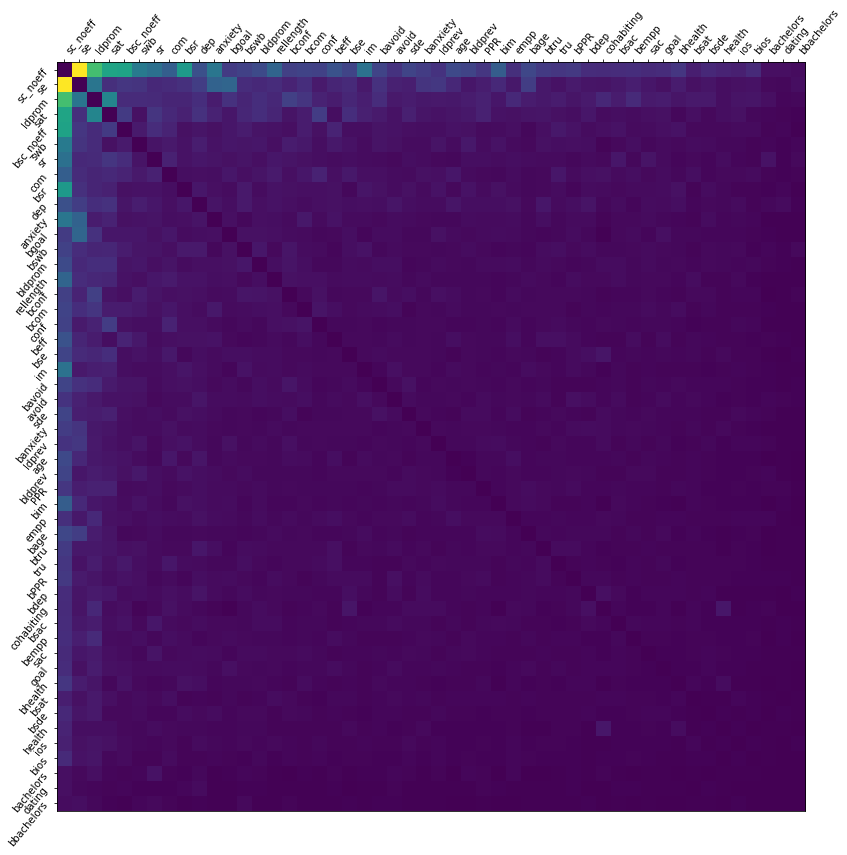

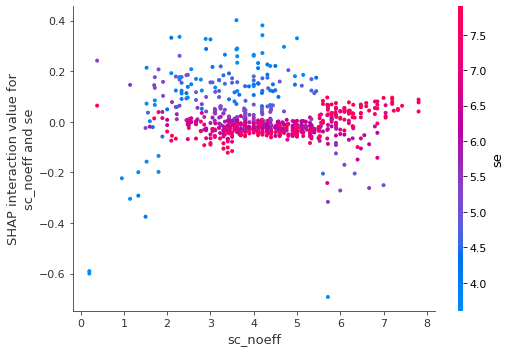

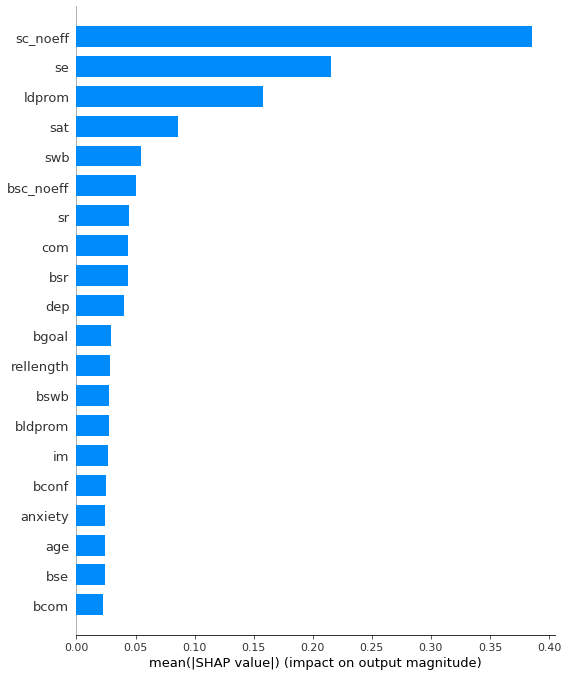

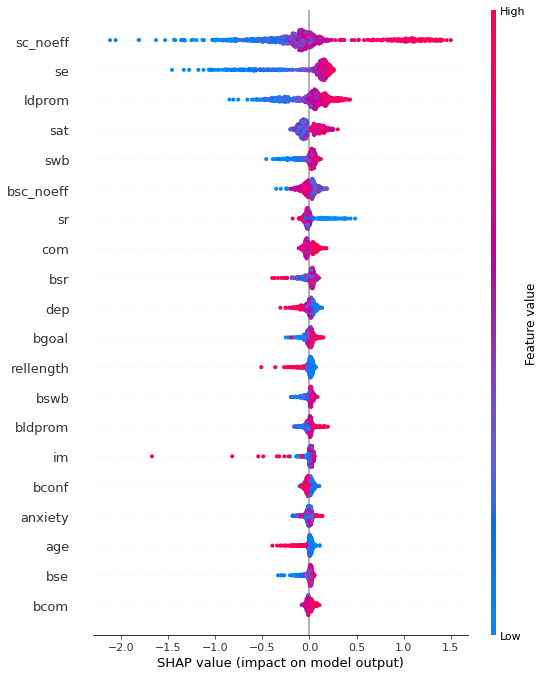

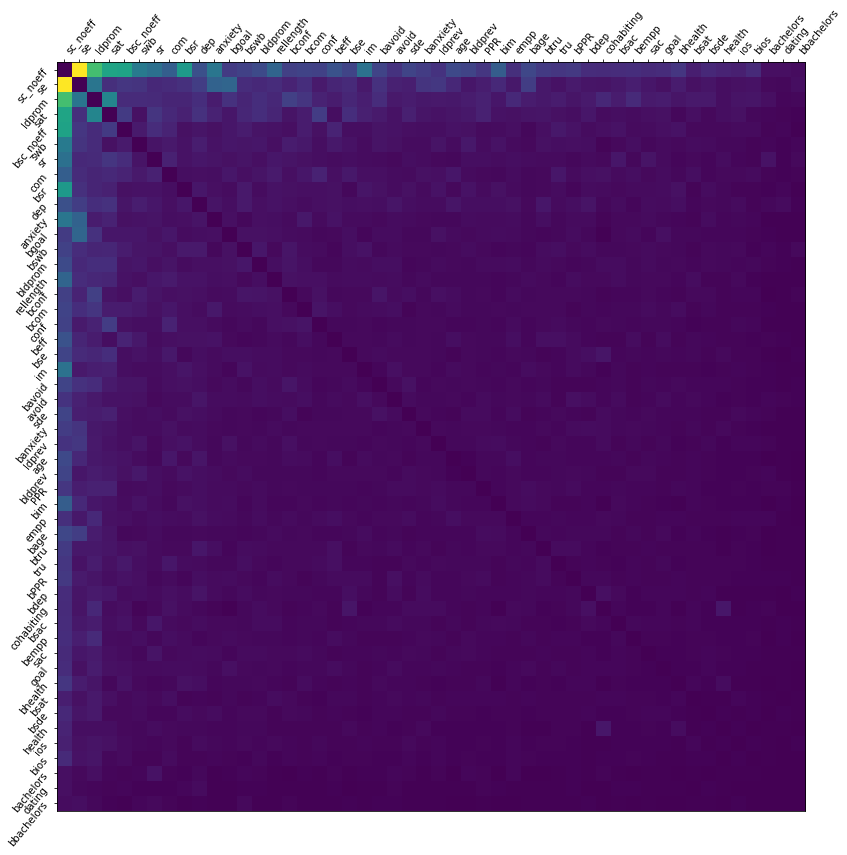

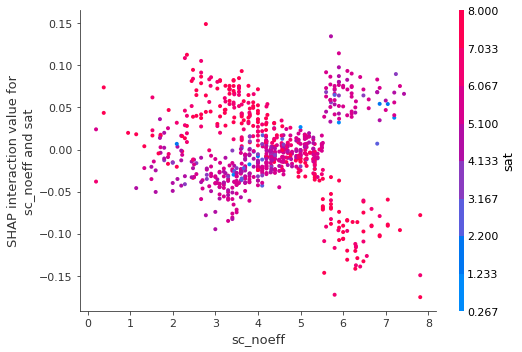

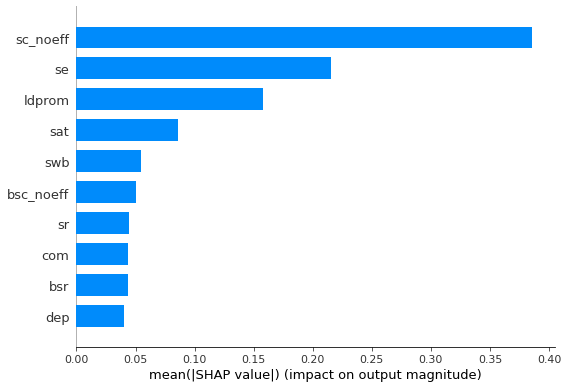

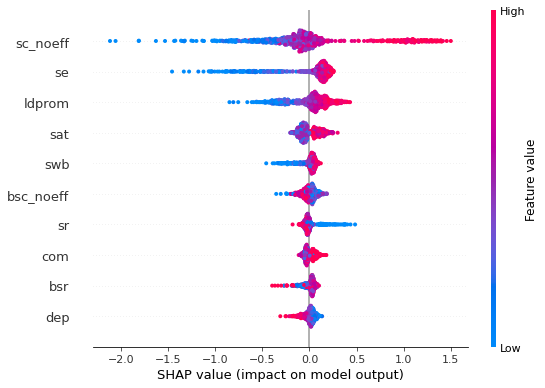

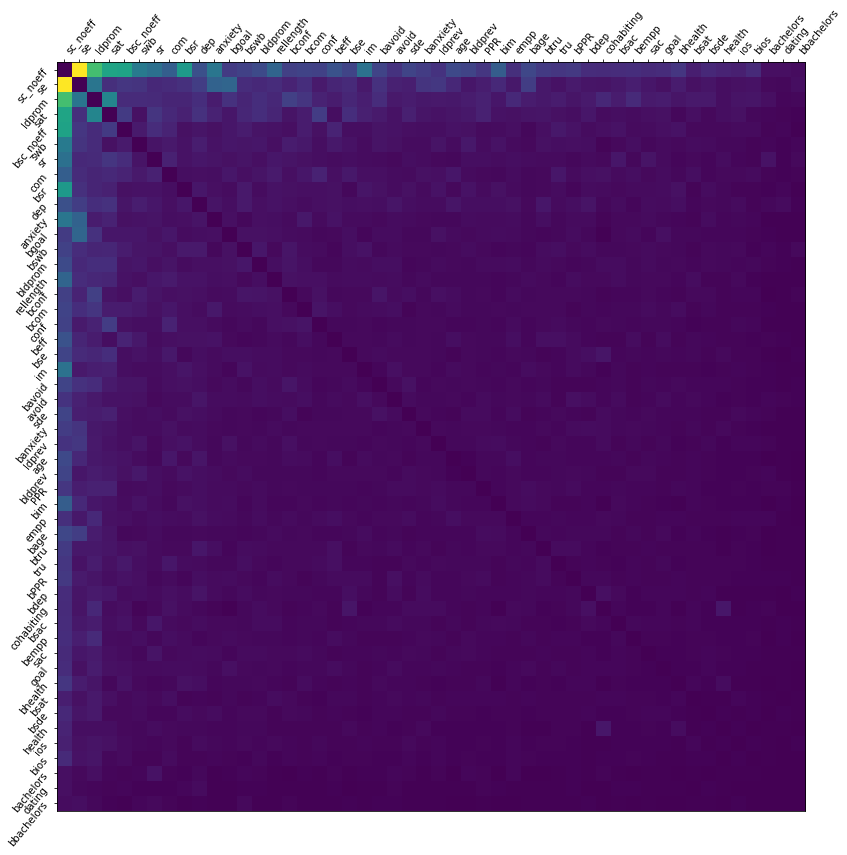

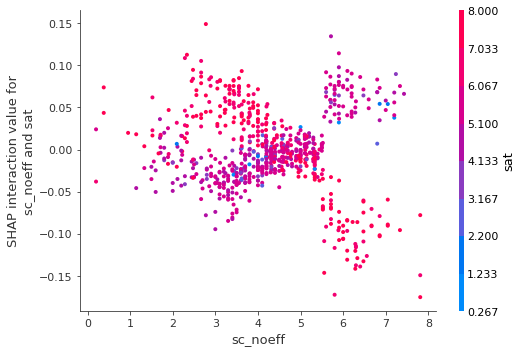

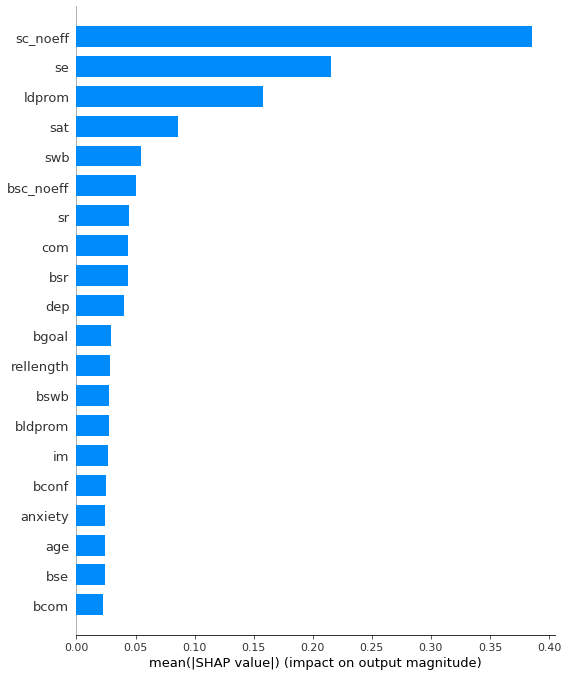

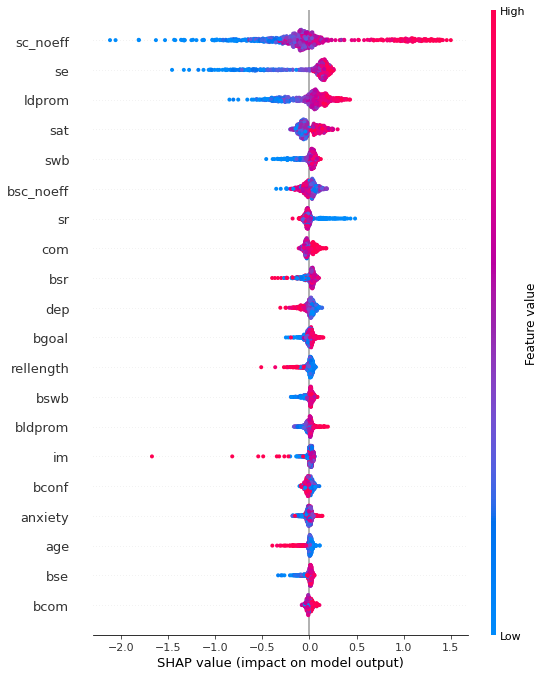

In [9]:
k = 10
outcome_var = 'eff'
ds = dataset[(dataset['sample']<4)]
remove_cols = ['sample','coupleid', 'scc', 'sdta', 'sdtr', 'sdtc',
               'aff', 'bscc', 'bsdta', 'bsdtr', 'bsdtc', 'b_aff']

results_dir = os.path.join(od, outcome_var + '_AP3')
make_folder(results_dir)
model_dir = os.path.join(od, 'model.sav')

shap_env = RFShap(model_dir=None, exclude_vars=remove_cols, outcome_var=outcome_var,
                  output_dir=results_dir, random_seed=42, class_=class_,type_='reg', balanced='balanced', trn_tst_split=trn_tst_split,
                    k_cv=k_cv, k=k)
ds, X, y, xtr, xts, ytr, ytst  = shap_env.munch(dataset=ds)

model = shap_env.make_model(config)
model, report = shap_env.train_test()
print(report)

explainer, shap_vals = shap_env.run_shap_explainer(model=model)


specific_var = None
interaction_vars = ['sc_noeff', 'ldprom']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)
specific_var = None
interaction_vars = ['sc_noeff', 'se']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)
specific_var = None
interaction_vars = ['sc_noeff', 'sat']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)

# shap_vals_bootstrap, results = shap_env.shap_bootstrap(model=model, retrain=False, n_bootstraps=500, n_samples=60, class_ind=0)

Preparing dataset...
Check if continuous or categorical variables: 
{'dating': True, 'cohabiting': True, 'married': True, 'rellength': False, 'children': True, 'sex': True, 'age': False, 'black': True, 'asian': True, 'white': True, 'hispanic': True, 'nocollege': True, 'somecollege': True, 'bachelors': True, 'graduate': True, 'sc_noeff': False, 'se': False, 'sr': False, 'sde': False, 'im': False, 'anxiety': False, 'avoid': False, 'health': False, 'swb': False, 'dep': False, 'empp': False, 'tru': False, 'com': False, 'sat': False, 'ios': False, 'eff': False, 'aff': False, 'bsex': True, 'bage': False, 'bblack': True, 'basian': True, 'bwhite': True, 'bhispanic': True, 'bnocollege': True, 'bsomecollege': True, 'bbachelors': True, 'bgraduate': True, 'bsc_noeff': False, 'bse': False, 'bsr': False, 'bsde': False, 'bim': False, 'banxiety': False, 'bavoid': False, 'bhealth': False, 'bswb': False, 'bdep': False, 'bempp': False, 'btru': False, 'bcom': False, 'bsat': False, 'bios': False, 'beff': F

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


Training fold:  2
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  3
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  4
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  5
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  6
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  7
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  8
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  9
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Training fold:  10
Creating fresh model...
Created:  RandomForestRegressor(random_state=42)
Last row is the mean across columns.
    expl_var       mae       mse      msle    med_ae        r2
0   0.301936  1.048322  1.755986  0.046801  0.834890  0.244380
1   0.305747  1.0

model_output = "margin" has been renamed to model_output = "raw"
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


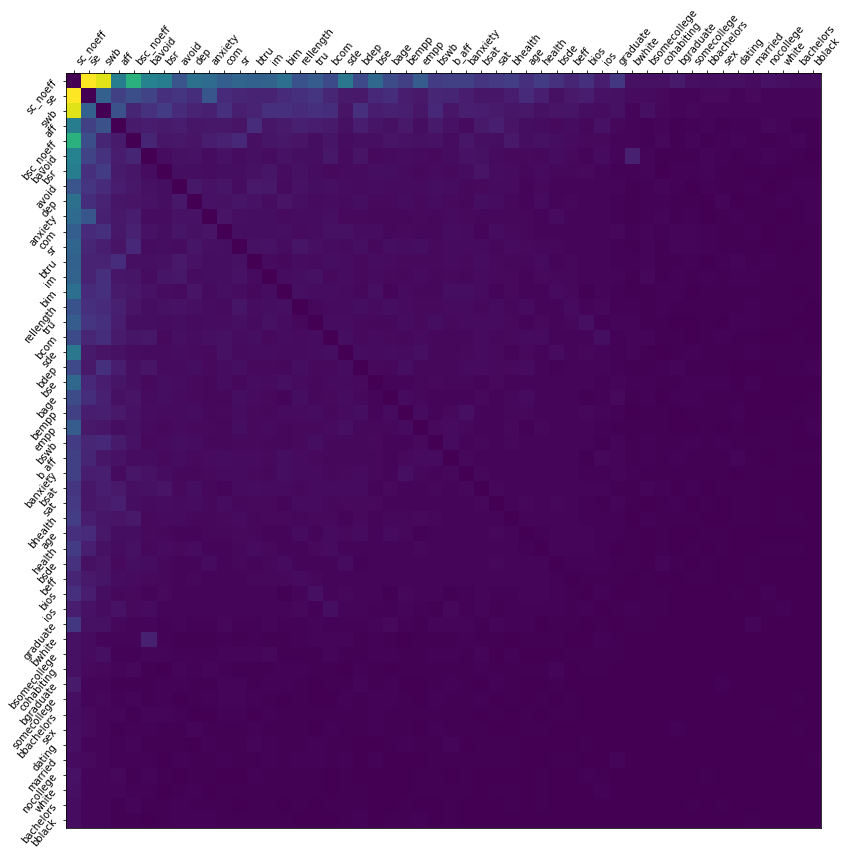

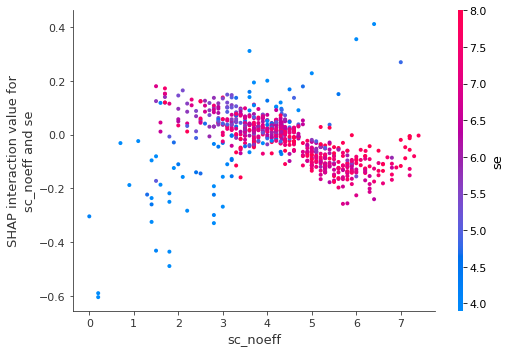

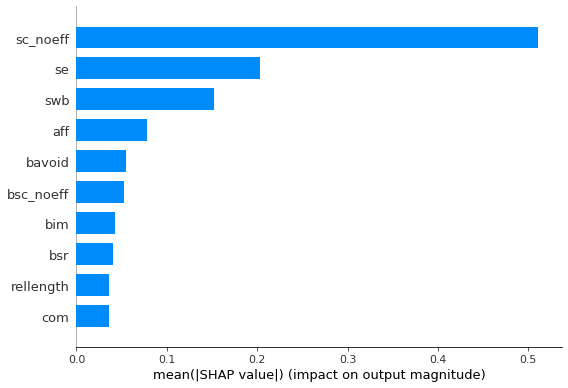

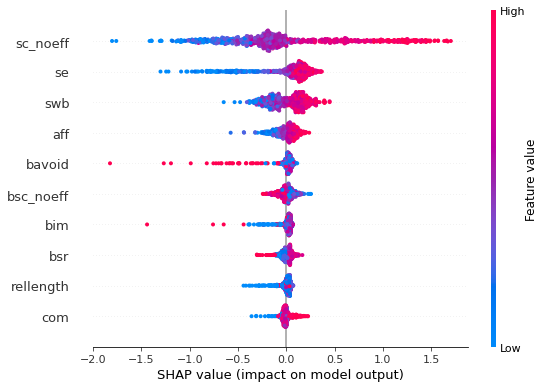

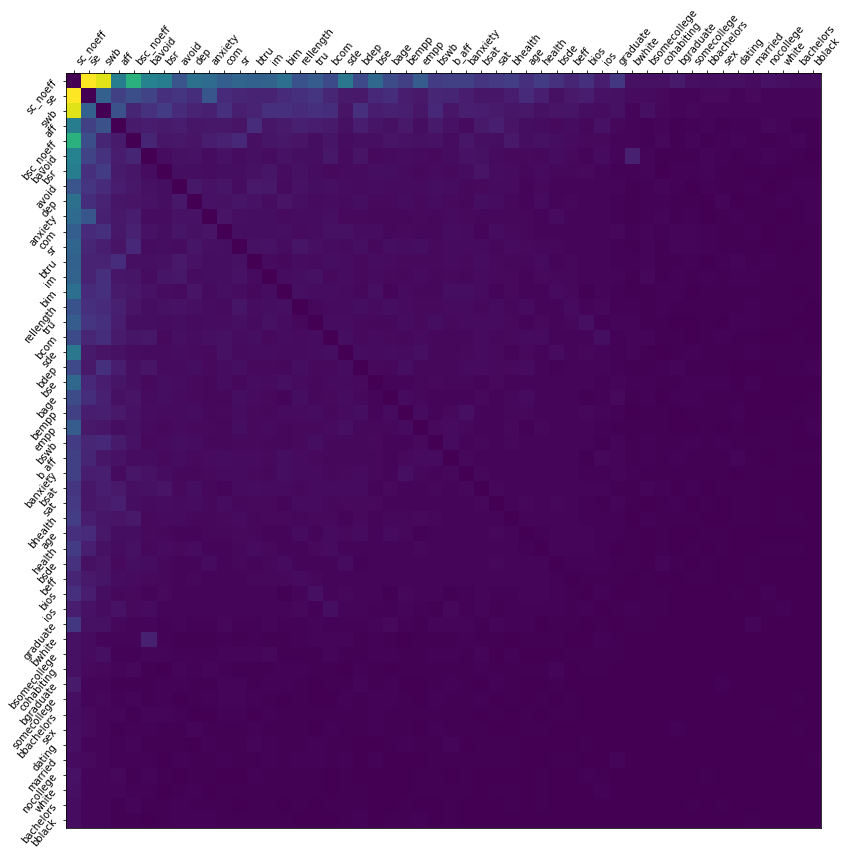

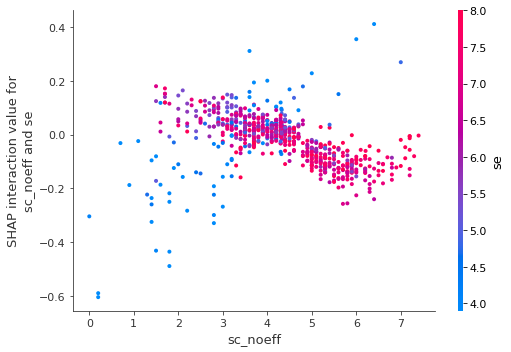

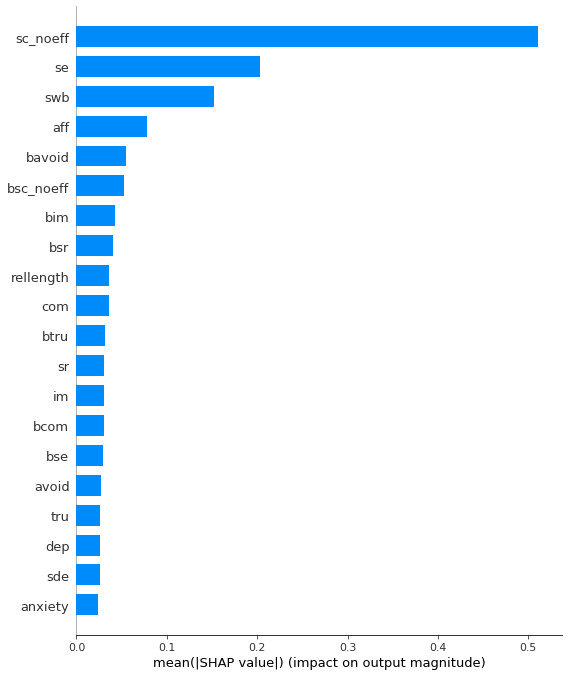

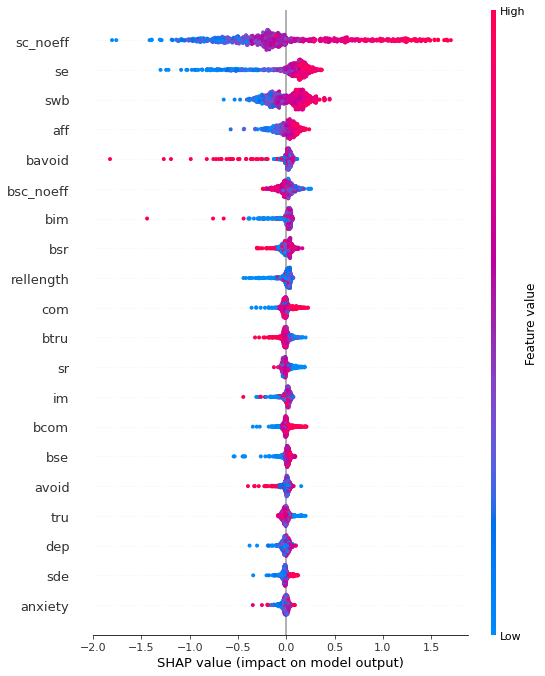

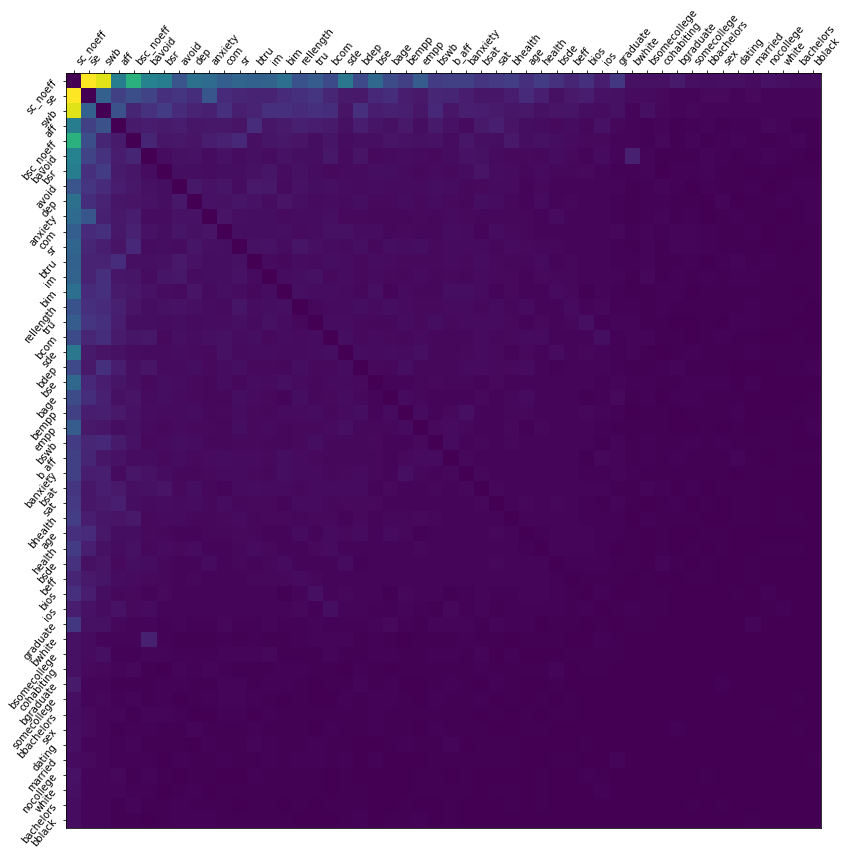

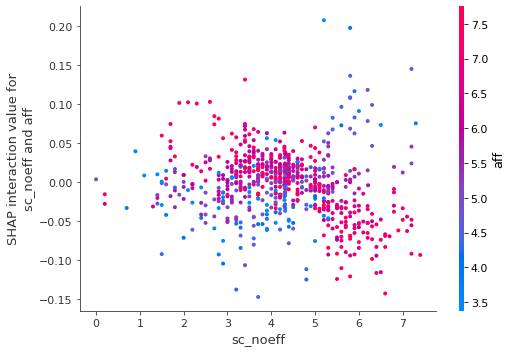

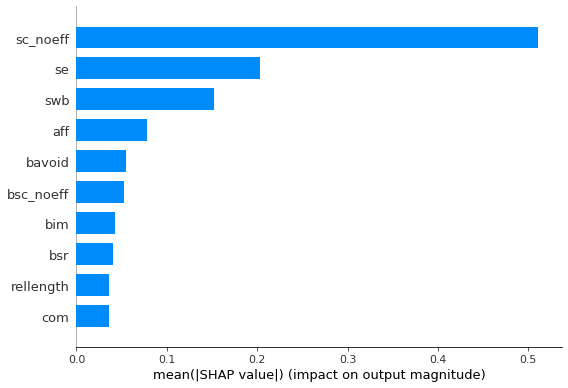

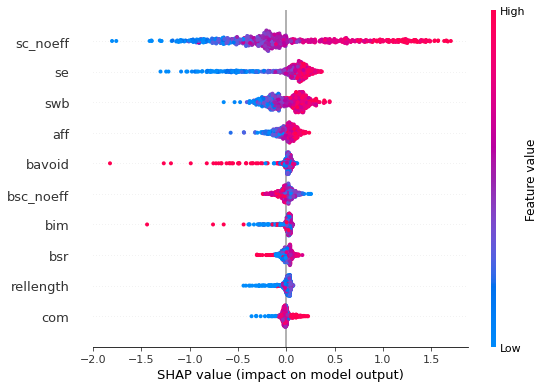

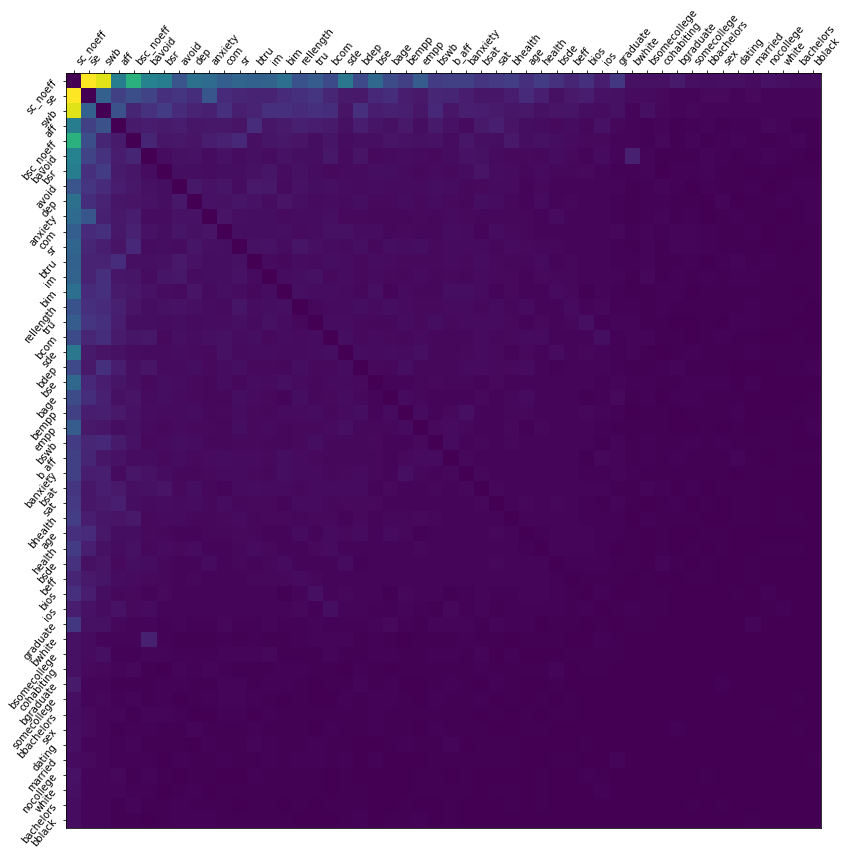

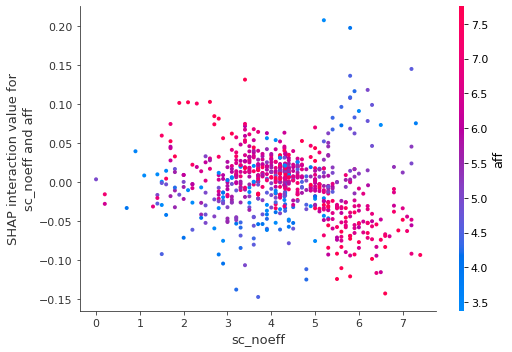

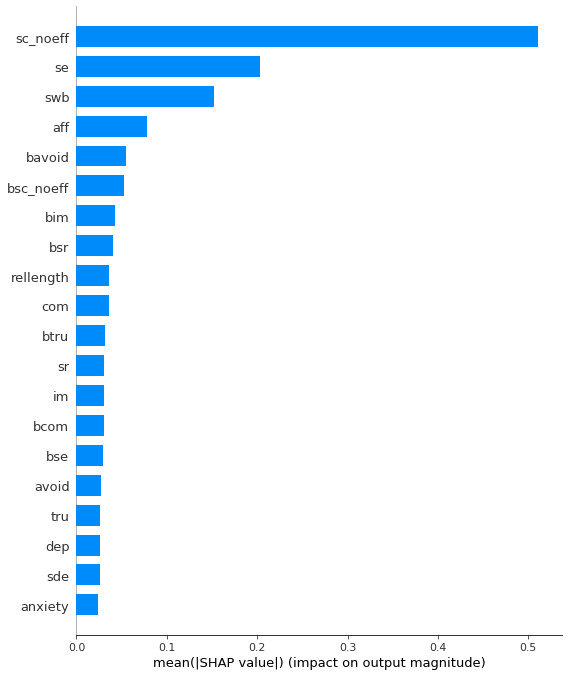

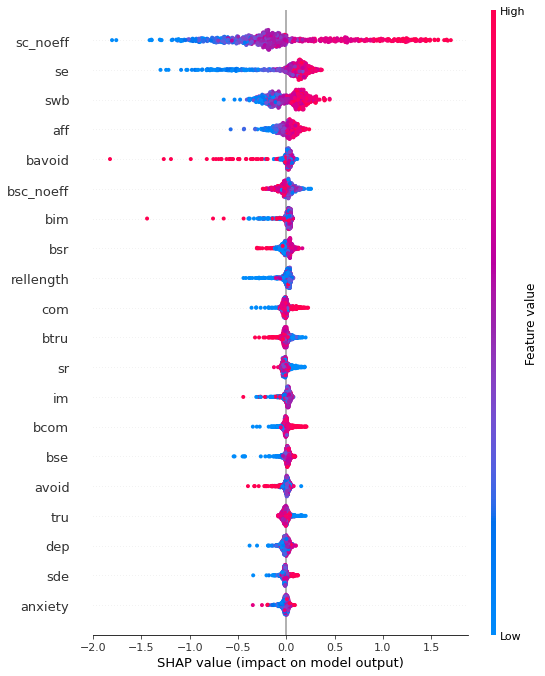

In [10]:
k = 10
outcome_var = 'eff'
ds = dataset[(dataset['sample']>2)]
remove_cols = ['sample','coupleid', 'goal', 'PPR', 'ldprom', 'ldprev',
               'conf', 'sac', 'scc', 'sdta', 'sdtr', 'sdtc', 'bgoal',
               'bPPR', 'bldprom', 'bldprev', 'bconf', 'bsac',
               'bscc', 'bsdta', 'bsdtr', 'bsdtc']

results_dir = os.path.join(od, outcome_var + '_AP4')
make_folder(results_dir)
model_dir = os.path.join(od, 'model.sav')

shap_env = RFShap(model_dir=None, exclude_vars=remove_cols, outcome_var=outcome_var,
                  output_dir=results_dir, random_seed=42, class_=class_,type_='reg', balanced='balanced', trn_tst_split=trn_tst_split,
                    k_cv=k_cv, k=k)
ds, X, y, xtr, xts, ytr, ytst  = shap_env.munch(dataset=ds)

model = shap_env.make_model(config)
model, report = shap_env.train_test()
print(report)

explainer, shap_vals = shap_env.run_shap_explainer(model=model)



specific_var = None
interaction_vars = ['sc_noeff', 'se']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)
specific_var = None
interaction_vars = ['sc_noeff', 'aff']
# to create plots (and automatrically save them to the output directory):
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_1)             
interaction_vals = shap_env.shap_plot(explainer=explainer, shap_vals=shap_vals, specific_var=specific_var, interactions=True, interaction_vars=interaction_vars, classwise=True, class_ind=1, num_display=num_disp_2)

# shap_vals_bootstrap, results = shap_env.shap_bootstrap(model=model, retrain=False, n_bootstraps=500, n_samples=60, class_ind=0)